# Wildfire & Crop Monitoring using Remote Sensing and Machine Learning

## UMBC Data Science Master Degree Capstone by Dr. Chaojie (Jay) Wang
## Author: Akhil Kanukula, Sanjay Varatharajan

## Introduction

##### Wildfires and agricultural productivity are two pressing challenges with direct impacts on food security, climate change, and economic stability. The increasing frequency and intensity of wildfires, often exacerbated by drought, heatwaves, and land-use changes, have led to devastating losses of crops, ecosystems, and infrastructure. Simultaneously, monitoring crop health and yield is vital for managing supply chains, ensuring farmer profitability, and supporting policy decisions.

##### This project aims to leverage satellite remote sensing data and machine learning techniques to develop a Wildfire & Crop Monitoring Platform. The platform will integrate geospatial datasets such as NASA FIRMS wildfire data, Sentinel-2 multispectral imagery, and ERA5 reanalysis climate variables to provide insights into:

##### Wildfire detection and risk prediction (fire hotspots, burned area mapping, and environmental drivers).

##### Crop monitoring and yield estimation (vegetation indices such as NDVI/EVI, drought stress, and climate effects).

##### By combining exploratory data analysis (EDA), predictive modeling, and geospatial visualization, the project will demonstrate how data-driven approaches can help stakeholders—including farmers, policymakers, and emergency response teams—make timely and informed decisions. Ultimately, the system has the potential to scale into a web-based decision-support platform, enabling real-world applications such as early warning systems and agricultural advisories.

## Background

##### Wildfires and agricultural monitoring are critical concerns in today’s world due to their economic, environmental, and social impacts. In recent years, climate change has intensified drought conditions, altered precipitation patterns, and increased the frequency of extreme weather events, all of which contribute to higher wildfire risks and fluctuating crop yields.

##### According to NASA and the FAO (Food and Agriculture Organization), wildfires burn an estimated 400 million hectares of land annually, destroying crops, forests, and biodiversity. At the same time, agriculture faces growing pressure to feed an expanding global population under increasingly uncertain climate conditions. Early detection of wildfires and accurate assessment of crop health are therefore essential for disaster management, food security, and sustainable resource allocation.

## Why Does This Matter?

##### Economic Impact: Crop losses and wildfire damages can cost billions annually. Farmers, insurers, and governments need reliable forecasting tools to mitigate these losses.

##### Food Security: Crop monitoring ensures stable yields, supports trade decisions, and helps identify potential shortages.

##### Climate Change Adaptation: Both wildfire patterns and crop health are climate-sensitive. Understanding these dynamics supports adaptation strategies.

##### Public Safety: Timely wildfire detection can save lives and reduce property loss.

## Research Questions

##### This project will focus on the following research questions:

##### How can remote sensing data be used to detect and predict wildfire risks in near real-time?

##### What vegetation and climate indicators are most predictive of crop health and yield variation?

##### Can machine learning models trained on geospatial data provide accurate, scalable, and actionable insights for wildfire and agricultural monitoring?

##### How can these insights be integrated into a web-based decision-support platform for use by farmers, policymakers, and emergency response teams?

## Modules Installed

In [2]:
#!pip install xarray netCDF4


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 17.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 43.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#!pip install netCDF4



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install rasterio numpy matplotlib

  Using cached rasterio-1.4.3-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached rasterio-1.4.3-cp312-cp312-win_amd64.whl (25.4 MB)
Using cached click-8.3.0-py3-none-any.whl (107 kB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl (11 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install h5py

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 28.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data 

### ERA5

<xarray.Dataset> Size: 116MB
Dimensions:         (valid_time: 2, pressure_level: 2, latitude: 721,
                     longitude: 1440)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 16B 2024-07-01 2024-08-01
  * pressure_level  (pressure_level) float64 16B 1e+03 850.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          (valid_time) <U4 32B ...
Data variables:
    cc              (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    z               (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    r               (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    u               (valid_tim

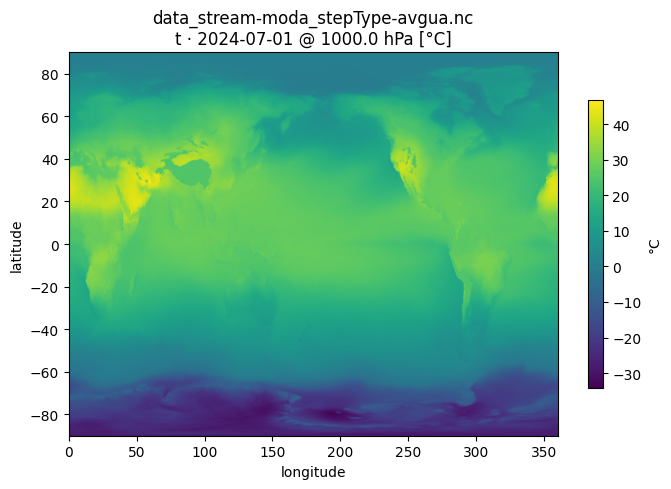

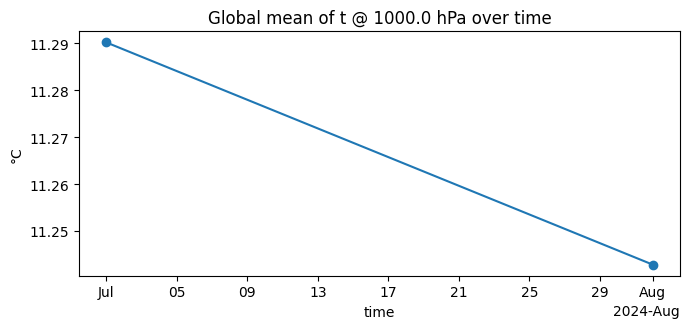

In [1]:
# --- one-time installs (uncomment if needed) ---
# !pip install xarray netCDF4 numpy matplotlib

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

FILE = r"D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\data_stream-moda_stepType-avgua.nc"

# --- Try xarray first (recommended), fall back to netCDF4 ---
ds = None
xr_err = None
try:
    import xarray as xr
    ds = xr.open_dataset(FILE)
except Exception as e:
    xr_err = e

if ds is None:
    # Fallback: minimal netCDF4 reader (no dask; just to inspect)
    from netCDF4 import Dataset as NC4Dataset
    nc = NC4Dataset(FILE, "r")
    print("Opened with netCDF4. Global attributes:")
    for k in nc.ncattrs():
        print(f"  - {k}: {getattr(nc, k)}")
    print("\nVariables:")
    for name, var in nc.variables.items():
        print(f"  - {name}: shape={getattr(var, 'shape', None)}, dtype={getattr(var,'dtype',None)}")
    nc.close()
    raise SystemExit(f"Tip: install xarray for easier analysis. xarray error was: {xr_err}")

# ---------- With xarray ----------
print(ds)                      # full summary
print("\nGlobal attributes:")
for k,v in ds.attrs.items():
    print(f"  {k}: {v}")

# Prefer common ERA5 vars; otherwise choose largest numeric 2D–4D
PREFERRED = ("t","u","v","q","r","z","cc")
def pick_science_var(ds):
    for name in PREFERRED:
        if name in ds.data_vars:
            return name
    best_name, best_n = None, -1
    for name, da in ds.data_vars.items():
        if np.issubdtype(da.dtype, np.number) and 2 <= da.ndim <= 4:
            n = int(np.prod(da.shape))
            if n > best_n:
                best_name, best_n = name, n
    return best_name

var_name = pick_science_var(ds)
if var_name is None:
    print("⚠️ No suitable numeric variable found. Variables present:")
    for k, v in ds.data_vars.items():
        print(f"  - {k}: dtype={v.dtype}, dims={v.dims}, shape={tuple(v.shape)}")
else:
    print(f"\nPicked variable: {var_name}")

da = ds[var_name]

# Identify coordinate names safely
def _find(name_list, candidates):
    return next((c for c in candidates if c.lower() in name_list), None)

lat_name = _find({"lat","latitude"}, da.coords)
lon_name = _find({"lon","longitude"}, da.coords)
time_name = _find({"time"}, da.coords)

# -------- Reduce to a 2D (lat, lon) slice robustly --------
LEVEL = 1000.0    # try 1000 hPa first; if absent, will fall back
TIME_INDEX = 0    # 0 = first time (2024-07-01), 1 = second (2024-08-01)

# Prefer selecting the requested level/time if present
sel_kwargs = {}
if "valid_time" in da.dims:
    sel_kwargs["valid_time"] = da["valid_time"][TIME_INDEX]
if "pressure_level" in da.dims:
    levels = da["pressure_level"].values
    if float(LEVEL) in levels:
        sel_kwargs["pressure_level"] = float(LEVEL)
    else:
        # fall back to the first available level
        sel_kwargs["pressure_level"] = float(levels[0])

da2 = da.sel(**sel_kwargs) if sel_kwargs else da

# If still >2D, collapse extra leading dims by taking the middle index
while da2.ndim > 2:
    d0 = da2.dims[0]
    mid = da2.sizes[d0] // 2
    da2 = da2.isel({d0: mid})

# ---- Quick stats (and °C conversion for temperature) ----
title_unit = da2.attrs.get("units", "")
if var_name == "t":  # Kelvin -> Celsius
    da2 = da2 - 273.15
    title_unit = "°C"

arr = np.array(da2.values, dtype=np.float32)
arr = np.where(np.isfinite(arr), arr, np.nan)
print("\nQuick stats (2D slice):")
print(f"  min={np.nanmin(arr):.4f}, max={np.nanmax(arr):.4f}, mean={np.nanmean(arr):.4f}, std={np.nanstd(arr):.4f}")

# --- Plot preview (no cartopy) ---
# If 1D lat/lon coords exist, use them for extent/axes
extent = None
if lat_name and lon_name and da2[lat_name].ndim == 1 and da2[lon_name].ndim == 1:
    lat = da2[lat_name].values
    lon = da2[lon_name].values
    extent = [lon.min(), lon.max(), lat.min(), lat.max()]

plt.figure(figsize=(7,5))
if extent is not None:
    plt.imshow(arr, origin="upper", extent=extent, aspect="auto")
    plt.xlabel(lon_name or "lon"); plt.ylabel(lat_name or "lat")
else:
    plt.imshow(arr, origin="upper", aspect="equal")
    plt.xlabel("x"); plt.ylabel("y")

t_text = ""
if "valid_time" in sel_kwargs:
    t_val = np.datetime_as_string(sel_kwargs["valid_time"].values, unit="D")
    t_text += f" · {t_val}"
if "pressure_level" in sel_kwargs:
    t_text += f" @ {sel_kwargs['pressure_level']} hPa"

plt.title(Path(FILE).name + f"\n{var_name}{t_text} [{title_unit}]")
plt.colorbar(shrink=0.75, label=title_unit)
plt.tight_layout()
plt.show()

# --- Optional: global-mean time series at chosen level (if time exists) ---
if "valid_time" in da.dims:
    ts = da
    if "pressure_level" in da.dims:
        # fix the same level used above
        ts = ts.sel(pressure_level=sel_kwargs.get("pressure_level", float(da["pressure_level"].values[0])))
    # mean over non-time dims
    ts = ts.mean(dim=[d for d in ts.dims if d != "valid_time"], skipna=True)
    if var_name == "t":
        ts = ts - 273.15
    plt.figure(figsize=(7,3.4))
    ts.plot(marker="o")
    plt.title(f"Global mean of {var_name}" + (f" @ {sel_kwargs.get('pressure_level')} hPa" if "pressure_level" in da.dims else "") + " over time")
    plt.ylabel("°C" if var_name == "t" else da.attrs.get("units", ""))
    plt.tight_layout()
    plt.show()

ds.close()


### HLS (GeoTIFF: surface reflectance & masks)

Found 3 GeoTIFFs (showing 3).

HLS-VI.S30.T10SDG.2024229T184919.v2.0.EVI.tif
  shape: (3660, 3660) crs: EPSG:32610 dtype(raw): int16 nodata(raw): -19999.0
  scale_used: 0.0001
  scaled stats: {'min': -0.27070000767707825, 'max': 0.241799995303154, 'mean': -0.004124258179217577}


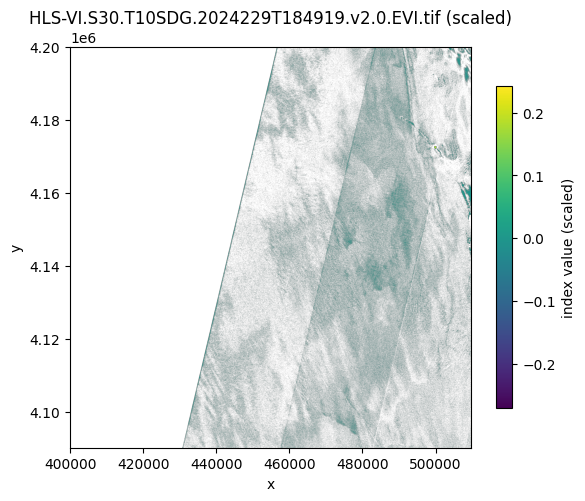


HLS-VI.S30.T10SDG.2024229T184919.v2.0.MSAVI.tif
  shape: (3660, 3660) crs: EPSG:32610 dtype(raw): int16 nodata(raw): -19999.0
  scale_used: 0.0001
  scaled stats: {'min': -0.11409999430179596, 'max': 0.2248999923467636, 'mean': -0.003278027754276991}


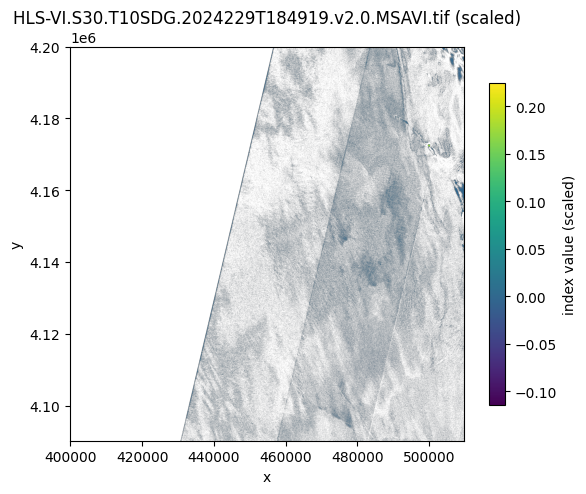


HLS-VI.S30.T10SDG.2024229T184919.v2.0.NBR.tif
  shape: (3660, 3660) crs: EPSG:32610 dtype(raw): int16 nodata(raw): -19999.0
  scale_used: 0.0001
  scaled stats: {'min': -0.9861999750137329, 'max': 0.7410999536514282, 'mean': -0.7138984203338623}


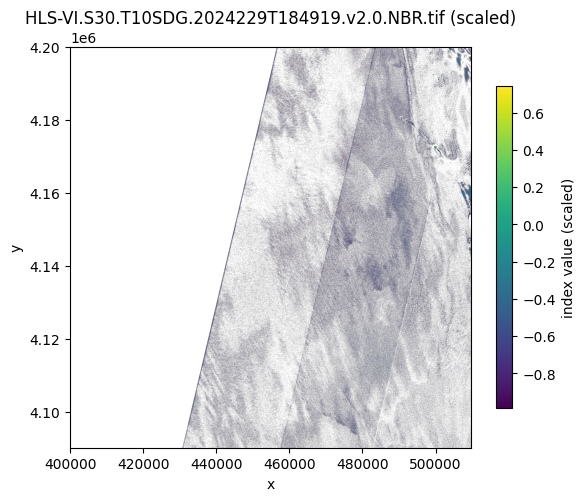

In [5]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import plotting_extent

# ---------- config ----------
HLS_DIR = Path(r"D:\606Data\HLS_Dataset")   # change if needed
SAMPLE = 3                                   # how many files to preview
DEFAULT_SCALE = 1e-4                          # HLS VI products are typically scaled by 0.0001
FILL_VALUES = {-9999, -19999}                 # common HLS VI fill values (keep both just in case)

# ---------- helper: read, mask, scale ----------
def read_hls_vi_band(ds):
    """
    Reads band-1 as float32, masks fill values, applies scale.
    Returns (arr_scaled, scale_used).
    """
    arr = ds.read(1).astype("float32")

    # Collect possible fill values
    fills = set(FILL_VALUES)
    if ds.nodata is not None:
        # If nodata looks like a sentinel (e.g., -9999 or -19999), include it
        try:
            if float(ds.nodata) <= -9000:
                fills.add(float(ds.nodata))
        except Exception:
            pass

    # Mask fills -> NaN
    if fills:
        mask = np.isin(arr, list(fills))
        arr[mask] = np.nan

    # Determine scale (prefer GDAL scale if present)
    scale_used = DEFAULT_SCALE
    try:
        # Some files store scale/offset in tags
        t = ds.tags()
        # Common keys (may vary); keep robust
        for k in ("SCALE", "scale", "Scale", "scale_factor", "SCALE_FACTOR"):
            if k in t:
                scale_used = float(t[k])
                break
        # Raster band scale metadata (if available)
        if hasattr(ds, "scales") and ds.scales and ds.scales[0] not in (None, 0, 1):
            scale_used = float(ds.scales[0])
    except Exception:
        pass

    # Apply scale
    arr *= scale_used
    return arr, scale_used

# ---------- main ----------
tifs = sorted([p for p in HLS_DIR.rglob("*.tif")])[:SAMPLE]
print(f"Found {len(tifs)} GeoTIFFs (showing {len(tifs)}).")

for fp in tifs:
    with rasterio.open(fp) as ds:
        arr_scaled, scale_used = read_hls_vi_band(ds)

        # Stats on valid pixels
        valid = arr_scaled[~np.isnan(arr_scaled)]
        stats = {
            "min": float(np.nanmin(valid)) if valid.size else None,
            "max": float(np.nanmax(valid)) if valid.size else None,
            "mean": float(np.nanmean(valid)) if valid.size else None,
        }

        print(f"\n{fp.name}")
        print("  shape:", (ds.height, ds.width),
              "crs:", ds.crs,
              "dtype(raw):", ds.dtypes[0],
              "nodata(raw):", ds.nodata)
        print(f"  scale_used: {scale_used}")
        print("  scaled stats:", stats)

        # Plot on a SINGLE axes (no blank subplot)
        fig, ax = plt.subplots(figsize=(6, 5))
        extent = plotting_extent(ds)
        im = ax.imshow(arr_scaled, extent=extent, origin="upper", aspect="equal")
        ax.set_title(f"{fp.name} (scaled)")
        ax.set_xlabel("x"); ax.set_ylabel("y")
        cbar = fig.colorbar(im, ax=ax, shrink=0.8)
        cbar.set_label("index value (scaled)")
        plt.tight_layout()
        plt.show()


### VIIRS L2 Active Fires (375 m) — robust inspector & plotter

Found 2 VIIRS files (showing 2).

=== VNP14IMG.A2024202.0948.002.2024213180147.nc ===
  detections plotted: 1662
  color var: FP_power (unit=MW)  min=0.222  max=157.400  mean=5.932


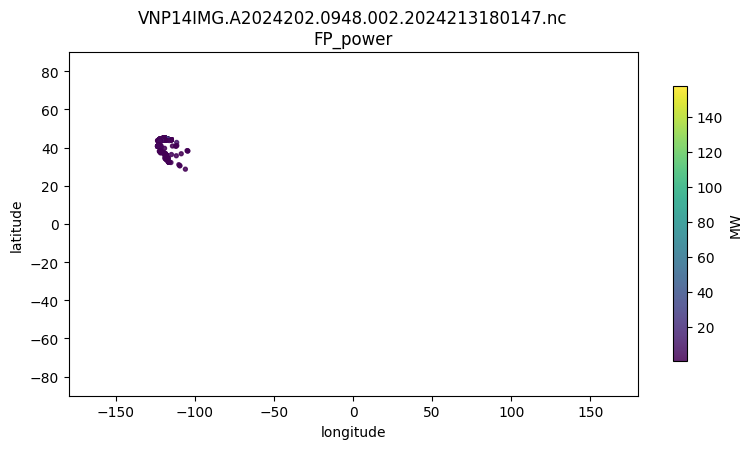


Table preview (first 20 rows):


,latitude,longitude,confidence,FRP,Rad13,T4,T5,WinSize,SolZen,SolAz,ViewZen,ViewAz,DayOfYear
0,45.013725,-119.176033,8.0,2.244241,1.223896,298.109894,286.871216,10.0,110.239998,26.170000,12.880000,102.389999,0.0
1,45.013065,-119.171227,8.0,2.244241,1.223896,308.979309,291.299988,10.0,110.239998,26.180000,12.849999,102.399994,0.0
2,45.009724,-119.172256,8.0,2.244241,1.223896,339.417297,296.636353,0.0,110.239998,26.180000,12.849999,102.269997,0.0
3,45.010387,-119.177101,8.0,2.244241,1.223896,302.848907,290.972382,10.0,110.239998,26.170000,12.880000,102.259995,0.0
4,45.006397,-119.173416,8.0,5.596195,2.370690,354.152496,297.610809,0.0,110.250000,26.180000,12.849999,102.139999,0.0
5,45.007069,-119.178307,8.0,5.596195,2.370690,311.019318,292.413330,10.0,110.250000,26.170000,12.880000,102.129997,0.0
6,45.003746,-119.179466,8.0,5.596195,2.370690,321.430389,292.715485,0.0,110.250000,26.170000,12.880000,102.000000,0.0
7,45.003059,-119.174522,8.0,5.596195,2.370690,347.826538,296.892609,0.0,110.250000,26.180000,12.849999,102.009995,0.0
8,45.004417,-119.184357,8.0,1.826275,0.596314,306.143646,291.489899,10.0,110.250000,26.170000,12.910000,101.989998,0.0
9,45.000404,-119.180519,8.0,3.543900,1.668703,333.728424,293.794525,0.0,110.250000,26.170000,12.880000,101.869995,0.0


Saved table → D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002\Data\VNP14IMG.A2024202.0948.002.2024213180147.nc.detections.csv

=== VNP14IMG.A2024202.1124.002.2024213180133.nc ===
  detections plotted: 1180
  color var: FP_power (unit=MW)  min=0.402  max=94.716  mean=4.492


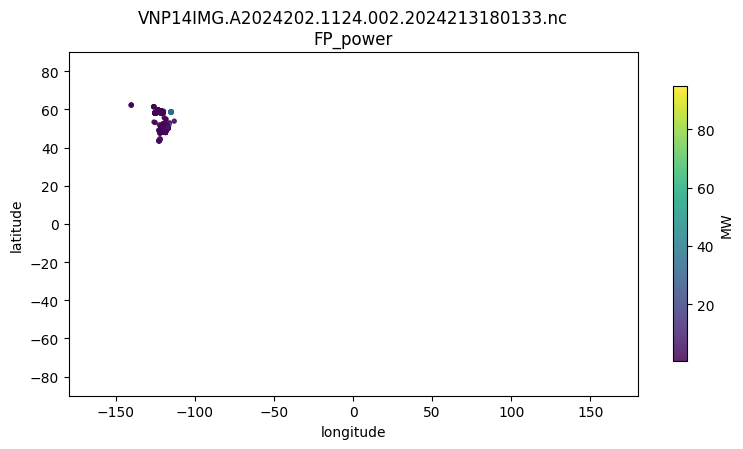


Table preview (first 20 rows):


,latitude,longitude,confidence,FRP,Rad13,T4,T5,WinSize,SolZen,SolAz,ViewZen,ViewAz,DayOfYear
0,58.781475,-115.146660,7.0,46.352467,8.022169,357.149841,287.741638,0.0,89.070000,49.509998,57.789997,-55.389999,1.0
1,58.779427,-115.140953,7.0,46.352467,8.022169,357.198273,286.550415,0.0,89.070000,49.509998,57.799999,-55.379997,1.0
2,58.774700,-115.146660,9.0,46.352467,8.022169,367.000000,294.445923,0.0,89.070000,49.509998,57.799999,-55.349998,1.0
3,58.778778,-115.158028,7.0,94.715607,5.587860,358.059906,285.716614,0.0,89.079994,49.500000,57.779999,-55.360001,1.0
4,58.772644,-115.140938,7.0,52.041512,3.310447,358.103302,292.265076,0.0,89.070000,49.509998,57.820000,-55.349998,1.0
5,58.773907,-115.163368,9.0,55.095074,6.433803,367.000000,293.773163,0.0,89.079994,49.500000,57.779999,-55.329998,1.0
6,58.775841,-115.168755,7.0,55.095074,6.433803,357.179016,289.339630,0.0,89.079994,49.489998,57.770000,-55.340000,1.0
7,58.771927,-115.157822,7.0,47.723213,8.246999,357.179016,297.723236,0.0,89.079994,49.500000,57.789997,-55.329998,1.0
8,58.767803,-115.146347,7.0,24.412096,5.785192,357.179016,289.659149,0.0,89.079994,49.509998,57.820000,-55.320000,1.0
9,58.765774,-115.140678,7.0,24.412096,5.785192,357.053375,285.474457,0.0,89.079994,49.509998,57.829998,-55.309998,1.0


Saved table → D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002\Data\VNP14IMG.A2024202.1124.002.2024213180133.nc.detections.csv


In [8]:
# --- VIIRS SNPP Active Fires (VNP14IMG) — scatter + table export ---
# Requirements: pip install xarray netCDF4 pandas numpy matplotlib

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

VIIRS_DIR = Path(r"D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002")
SAMPLE = 2   # how many files to preview
SHOW_ROWS = 20  # how many table rows to print/display

# Candidate variable names (case-insensitive)
LAT_CANDS   = ["fp_latitude", "latitude", "lat"]
LON_CANDS   = ["fp_longitude", "longitude", "lon"]
COLOR_CANDS = ["fp_power","fp_frp","frp","power","fp_confidence","confidence","fp_rad13","fp_t4","fp_t5","fp_meant4","fp_meant5"]

# Additional columns to include in the table if present
TABLE_CAND_GROUPS = {
    "confidence": ["FP_confidence", "confidence"],
    "FRP":        ["FP_power", "FP_FRP", "FRP", "Power", "power"],
    "Rad13":      ["FP_Rad13"],
    "T4":         ["FP_T4", "FP_MeanT4"],
    "T5":         ["FP_T5", "FP_MeanT5"],
    "WinSize":    ["FP_WinSize"],
    "SolZen":     ["FP_SolZenAng"],
    "SolAz":      ["FP_SolAzAng"],
    "ViewZen":    ["FP_ViewZenAng"],
    "ViewAz":     ["FP_ViewAzAng"],
    "DayOfYear":  ["FP_day"],            # day-of-year (sometimes present)
}

def pick_name(container_keys, candidates):
    """Return first key in container_keys that matches any candidate (case-insensitive), with fuzzy fallback."""
    low2orig = {str(k).lower(): k for k in container_keys}
    # exact (case-insensitive)
    for cand in candidates:
        k = low2orig.get(cand.lower())
        if k: return k
    # fuzzy contains
    for k_low, k in low2orig.items():
        for cand in candidates:
            if cand.lower() in k_low:
                return k
    return None

def to_float(a):
    arr = np.array(a, dtype=np.float32).ravel()
    arr[~np.isfinite(arr)] = np.nan
    return arr

files = sorted(list(VIIRS_DIR.rglob("*.nc")))[:SAMPLE]
print(f"Found {len(files)} VIIRS files (showing {len(files)}).")

for fp in files:
    print(f"\n=== {fp.name} ===")
    ds = xr.open_dataset(fp, mask_and_scale=True)

    # --- 1) Lat/Lon variables (in variables, not coords) ---
    lat_name = pick_name(ds.variables, LAT_CANDS)
    lon_name = pick_name(ds.variables, LON_CANDS)
    if not (lat_name and lon_name):
        print("  ⚠️ Could not find latitude/longitude variables.")
        print("  Variables (first 25):", list(ds.variables)[:25], "...")
        ds.close()
        continue

    lat = to_float(ds[lat_name].values)
    lon = to_float(ds[lon_name].values)

    # sanity mask
    m = np.isfinite(lat) & np.isfinite(lon) & (lat >= -90) & (lat <= 90) & (lon >= -180) & (lon <= 180)

    # --- 2) Pick color variable (for plotting) ---
    color_name = pick_name(ds.data_vars, COLOR_CANDS)
    c = None
    unit = None
    if color_name:
        c = to_float(ds[color_name].values)
        c = c[:lat.size]  # align lengths defensively
        unit = ds[color_name].attrs.get("units")
        # apply same mask
        m = m & np.isfinite(c)
    else:
        # keep m from lat/lon only
        pass

    lat, lon = lat[m], lon[m]
    if color_name:
        c = c[m]

    print(f"  detections plotted: {lat.size}")
    if color_name:
        v = c  # already finite
        if v.size:
            print(f"  color var: {color_name} (unit={unit})  "
                  f"min={float(np.nanmin(v)):.3f}  max={float(np.nanmax(v)):.3f}  mean={float(np.nanmean(v)):.3f}")
        else:
            print(f"  color var: {color_name} has no finite values; plotting uncolored points.")
            color_name, c, unit = None, None, None

    # --- 3) Plot scatter ---
    plt.figure(figsize=(8, 4.6))
    if c is None:
        plt.scatter(lon, lat, s=6, alpha=0.7)
        plt.title(f"{fp.name}\nVIIRS fire detections (points)")
    else:
        sc = plt.scatter(lon, lat, c=c, s=8, alpha=0.85)
        cb = plt.colorbar(sc, shrink=0.8)
        cb.set_label(unit or color_name)
        plt.title(f"{fp.name}\n{color_name}")
    plt.xlabel("longitude"); plt.ylabel("latitude")
    plt.xlim(-180, 180); plt.ylim(-90, 90)
    plt.tight_layout()
    plt.show()

    # --- 4) Build a table (DataFrame) with useful columns ---
    data = {
        "latitude":  lat,
        "longitude": lon,
    }

    # add candidate columns if present
    for pretty, cands in TABLE_CAND_GROUPS.items():
        name = pick_name(ds.data_vars, cands)
        if name:
            col = to_float(ds[name].values)[:lat.size]  # align length
            data[pretty] = col[m] if col.size >= m.size else col  # if already sliced, just use col

    # Add a simple timestamp column if a single time is available as a dataset attr/coord
    # (VNP14IMG often doesn’t include per-detection times; omit if not present)
    if "time" in ds.variables:
        try:
            tvals = np.array(ds["time"].values).ravel()
            # If scalar or length-1, broadcast
            if tvals.size == 1:
                data["time"] = np.repeat(tvals[0], lat.size)
        except Exception:
            pass

    df = pd.DataFrame(data)
    # Drop rows with no lat/lon (shouldn't happen after masking)
    df = df.dropna(subset=["latitude","longitude"])

    # Show a few rows and save to CSV
    print(f"\nTable preview (first {SHOW_ROWS} rows):")
    display(df.head(SHOW_ROWS))

    out_csv = fp.with_suffix(fp.suffix + ".detections.csv")
    df.to_csv(out_csv, index=False)
    print(f"Saved table → {out_csv}")

    ds.close()


**VIIRS VNP14IMG (375 m Active Fire detections)** 
**Location**

* **latitude, longitude** — WGS84 degrees (EPSG:4326) of each detected fire pixel (375 m “active fire” footprint).

**Fire signal & intensity**

* **confidence** — Algorithm confidence of a real fire at that pixel on a 0–100 scale.
  Rough guide: **0–30 = low**, **30–80 = nominal**, **80–100 = high**.
* **FRP** — **Fire Radiative Power**, proportional to combustion rate; **units: MW** (megawatts).
  Higher FRP ⇒ more energetic fire. You can **sum FRP** over a swath/region as a crude intensity proxy.
* **Rad13** — Radiance in the ~**3.9 µm** channel (VIIRS M13). **Units: W·m⁻²·sr⁻¹·µm⁻¹**.
  This is the short-wave IR band most sensitive to hot targets.
* **T4, T5** — Brightness temperatures (Kelvin) from two thermal channels used by the fire test.
  Conventionally: **T4 ≈ 3.9 µm** (hot-spot sensitive), **T5 ≈ ~11–12 µm** (ambient/background).
  Big **T4–T5** differences are typical for active fires.

**Geometry / context**

* **WinSize** — Size of the contextual window (in pixels) used by the detector around the candidate pixel.
* **SolZen / SolAz** — **Solar zenith/azimuth** angles (degrees) at the pixel at acquisition time.
* **ViewZen / ViewAz** — **Sensor (satellite) zenith/azimuth** angles (degrees).
* **DayOfYear** — Day-of-year of the observation (0–366). Often 0 if not populated; granule filename encodes the true date.

### How to interpret the row you’re seeing

Each row is one **fire detection**:

* where it is (lat/lon),
* how confident the algorithm is,
* how “hot/energetic” it looks (FRP, Rad13, T4),
* and the sun/satellite geometry that can affect retrievals.

### Quick usage tips

* Filter to **confidence ≥ 80** for high-quality detections; **≥ 30** for nominal.
* Use **FRP** to rank or aggregate intensity (e.g., total FRP per region/day).
* Use **T4** (K) or **Rad13** to look at relative hotness; **T4–T5** can help separate fires from warm backgrounds.
* Geometry (zenith angles) helps diagnose odd cases (very oblique views → more uncertainty).

If you want, I can add:

* a **confidence category** column (low/nominal/high),
* per-file **summary stats** (counts, total FRP, mean FRP),
* or a script to **concatenate all granules** into one CSV with a `granule_id` and UTC time.


### VIIRS JPSS-1 Active Fires (VJ114IMG, 375 m) — scatter + table export

Sampling 2 JPSS-1 granule(s)...

=== VJ114IMG.A2024229.1942.002.2024230003533.nc ===


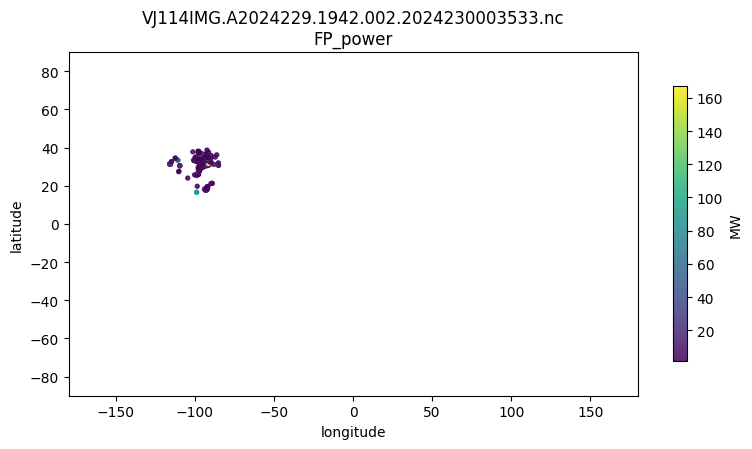

Previewing first 20 detections:


,latitude,longitude,confidence,FRP,Rad13,T4,T5,WinSize,SolZen,SolAz,ViewZen,ViewAz,DayOfYear
0,16.573105,-98.985771,7.0,95.816483,16.759802,207.934128,289.145325,0.0,15.290000,-99.949997,15.509999,79.930000,1.0
1,16.576504,-98.986351,8.0,95.816483,16.759802,344.752197,288.229767,10.0,15.290000,-99.970001,15.509999,80.029999,1.0
2,17.878777,-92.488899,8.0,4.617937,1.265951,332.746521,299.616425,10.0,21.650000,-98.829994,35.259998,-98.029999,1.0
3,17.894529,-92.491005,8.0,13.119839,1.663851,340.763702,299.191376,10.0,21.650000,-98.869995,35.259998,-98.229996,1.0
4,17.839802,-93.115166,8.0,19.921553,2.084396,338.352661,296.563080,10.0,21.059999,-99.159996,31.379999,-98.869995,1.0
5,17.839207,-93.118164,8.0,19.442719,2.081161,343.910553,297.716064,10.0,21.059999,-99.159996,31.410000,-97.320000,1.0
6,17.842999,-93.118683,8.0,8.464391,1.456813,336.326233,295.363434,10.0,21.059999,-99.169998,31.410000,-97.369995,1.0
7,17.842381,-93.123535,8.0,10.766913,1.607239,332.929016,296.091797,10.0,21.049999,-99.169998,31.379999,-97.369995,1.0
8,17.893518,-93.174904,8.0,7.426471,1.426081,336.602875,298.589233,10.0,21.010000,-99.339996,31.099998,-98.220001,1.0
9,17.892250,-93.184547,8.0,10.241082,1.600769,338.080505,298.057892,10.0,21.010000,-99.339996,31.029999,-98.220001,1.0



=== VJ114IMG.A2024222.1036.002.2024222164828.nc ===


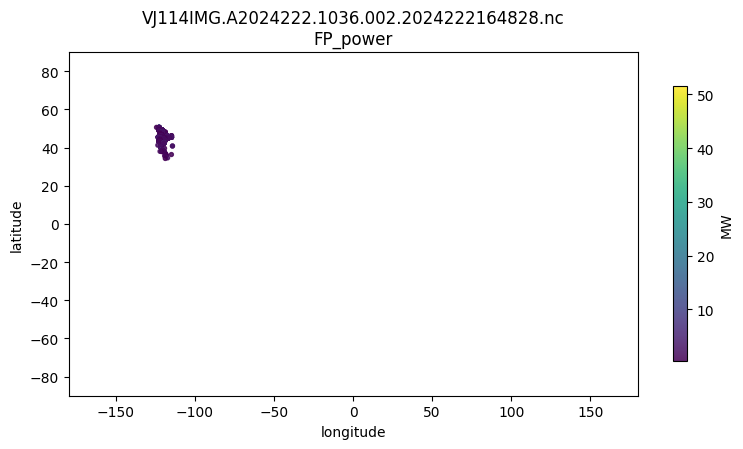

Previewing first 20 detections:


,latitude,longitude,confidence,FRP,Rad13,T4,T5,WinSize,SolZen,SolAz,ViewZen,ViewAz,DayOfYear
0,50.570770,-122.707397,8.0,2.675804,0.588226,325.782196,287.477356,0.0,107.049995,35.230000,23.189999,-71.750000,0.0
1,50.569595,-122.701561,8.0,0.584924,0.494412,301.707367,284.897675,10.0,107.049995,35.230000,23.219999,-71.739998,0.0
2,50.568180,-122.694557,8.0,0.584924,0.494412,296.914948,286.064819,10.0,107.049995,35.239998,23.250000,-71.739998,0.0
3,50.567108,-122.707939,8.0,15.487331,2.671542,354.838196,302.057709,0.0,107.049995,35.230000,23.189999,-71.680000,0.0
4,50.562794,-122.686668,8.0,4.170847,0.740269,329.082733,291.825134,0.0,107.049995,35.250000,23.279999,-71.659996,0.0
5,50.565914,-122.702011,8.0,5.974089,2.174975,309.095947,289.404694,10.0,107.049995,35.239998,23.219999,-71.669998,0.0
6,50.564445,-122.694771,8.0,5.974089,2.174975,314.460083,289.303558,10.0,107.049995,35.239998,23.250000,-71.669998,0.0
7,50.563435,-122.708458,8.0,15.487331,2.671542,332.075897,290.973877,0.0,107.059998,35.230000,23.189999,-71.599998,0.0
8,50.562233,-122.702507,8.0,5.974089,2.174975,337.929291,296.792297,0.0,107.049995,35.239998,23.219999,-71.599998,0.0
9,50.560776,-122.695305,8.0,5.974089,2.174975,343.534119,295.315216,0.0,107.049995,35.239998,23.250000,-71.599998,0.0


In [11]:
# --- VIIRS JPSS-1 Active Fires (VJ114IMG) — sample plots + table previews ---
# deps: pip install xarray netCDF4 pandas numpy matplotlib

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

VIIRS_DIR = Path(r"D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swath_375m_V002")

SAMPLE_FILES = 2      # how many granules to sample
SHOW_ROWS = 20        # how many table rows to preview per file

LAT_CANDS   = ["fp_latitude", "latitude", "lat"]
LON_CANDS   = ["fp_longitude", "longitude", "lon"]
COLOR_CANDS = ["fp_power","fp_frp","frp","power","fp_confidence","confidence","fp_rad13","fp_t4","fp_t5","fp_meant4","fp_meant5"]

TABLE_CAND_GROUPS = {
    "confidence": ["FP_confidence", "confidence"],
    "FRP":        ["FP_power", "FP_FRP", "FRP", "Power", "power"],
    "Rad13":      ["FP_Rad13"],
    "T4":         ["FP_T4", "FP_MeanT4"],
    "T5":         ["FP_T5", "FP_MeanT5"],
    "WinSize":    ["FP_WinSize"],
    "SolZen":     ["FP_SolZenAng"],
    "SolAz":      ["FP_SolAzAng"],
    "ViewZen":    ["FP_ViewZenAng"],
    "ViewAz":     ["FP_ViewAzAng"],
    "DayOfYear":  ["FP_day"],
}

def pick_name(container_keys, candidates):
    low2orig = {str(k).lower(): k for k in container_keys}
    for cand in candidates:
        k = low2orig.get(cand.lower())
        if k: return k
    for k_low, k in low2orig.items():
        for cand in candidates:
            if cand.lower() in k_low:
                return k
    return None

def to_float(a):
    arr = np.array(a, dtype=np.float32).ravel()
    arr[~np.isfinite(arr)] = np.nan
    return arr

# choose a random sample of granules
files = sorted(VIIRS_DIR.rglob("*.nc"))
if not files:
    raise SystemExit("No .nc files found in the folder.")
rng = np.random.default_rng(0)
files = list(rng.choice(files, size=min(SAMPLE_FILES, len(files)), replace=False))

print(f"Sampling {len(files)} JPSS-1 granule(s)...")

for fp in files:
    print(f"\n=== {fp.name} ===")
    ds = xr.open_dataset(fp, mask_and_scale=True)

    # lat/lon variables are in variables (not coords)
    lat_name = pick_name(ds.variables, LAT_CANDS)
    lon_name = pick_name(ds.variables, LON_CANDS)
    if not (lat_name and lon_name):
        print("  ⚠️ Could not find latitude/longitude variables.")
        print("  Variables (first 25):", list(ds.variables)[:25], "...")
        ds.close(); 
        continue

    lat = to_float(ds[lat_name].values)
    lon = to_float(ds[lon_name].values)

    # sane coordinate mask
    base_mask = np.isfinite(lat) & np.isfinite(lon) & (lat >= -90) & (lat <= 90) & (lon >= -180) & (lon <= 180)
    lat, lon = lat[base_mask], lon[base_mask]

    # pick a color variable for plotting if present
    color_name = pick_name(ds.data_vars, COLOR_CANDS)
    c = None; unit = None
    if color_name:
        c_all = to_float(ds[color_name].values)
        n = min(lat.size, lon.size, c_all.size)
        lat, lon, c_all = lat[:n], lon[:n], c_all[:n]
        mask = np.isfinite(c_all)
        lat, lon, c = lat[mask], lon[mask], c_all[mask]
        unit = ds[color_name].attrs.get("units")

    # ---------- PLOT ----------
    plt.figure(figsize=(8, 4.6))
    if c is None:
        plt.scatter(lon, lat, s=6, alpha=0.75)
        plt.title(f"{fp.name}\nVIIRS fire detections")
    else:
        sc = plt.scatter(lon, lat, c=c, s=8, alpha=0.85)
        cb = plt.colorbar(sc, shrink=0.8); cb.set_label(unit or color_name)
        plt.title(f"{fp.name}\n{color_name}")
    plt.xlabel("longitude"); plt.ylabel("latitude")
    plt.xlim(-180, 180); plt.ylim(-90, 90)
    plt.tight_layout(); plt.show()

    # ---------- TABLE PREVIEW ----------
    data = {"latitude": lat, "longitude": lon}
    for pretty, cands in TABLE_CAND_GROUPS.items():
        name = pick_name(ds.data_vars, cands)
        if name:
            vals = to_float(ds[name].values)
            vals = vals[:len(lat)]  # align length
            data[pretty] = vals

    # Optional: add a single time stamp if file provides a scalar time
    if "time" in ds.variables and ds["time"].size == 1:
        t0 = np.array(ds["time"].values).ravel()[0]
        data["time"] = np.repeat(t0, len(lat))

    df = pd.DataFrame(data).dropna(subset=["latitude","longitude"])

    print(f"Previewing first {SHOW_ROWS} detections:")
    display(df.head(SHOW_ROWS))

    ds.close()


### MODIS Burned Area Monthly

###### Conversion HDF Files to GeoTiff File. 

In [1]:
import subprocess, re, pathlib, sys

# --- EDIT THESE THREE ONLY (leave the rest) ---
CONDA_EXE = r"C:\Users\sanjay\miniconda3\Scripts\conda.exe"       # full path to conda.exe
ENV_NAME  = "geo"                                                  # the env that has GDAL
IN_DIR    = pathlib.Path(r"D:\606Data\MODISTera_HDFFILE\Data")     # folder with .hdf files
OUT_DIR   = pathlib.Path(r"D:\606Data\MODISTera_GEOTIFF_File")     # where to write .tif

# --- discover HDF files (both .hdf/.HDF), non-recursive; change to rglob if you want recursive ---
hdfs = sorted(list(IN_DIR.glob("*.hdf")) + list(IN_DIR.glob("*.HDF")))
OUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Found {len(hdfs)} HDF(s) in {IN_DIR}")
if not hdfs:
    sys.exit(0)

def pick_burn_sds(text: str):
    """Return the SUBDATASET_*_NAME for Burn Date (robust), else the first SDS, else None."""
    names = re.findall(r"SUBDATASET_\d+_NAME=(.*)", text)
    if not names:
        return None
    # prefer anything that looks like Burn Date
    keys = ("burn_date", "burndate", "burnedarea", "burned_area")
    for n in names:
        if any(k in n.lower() for k in keys):
            return n
    return names[0]  # fallback

ok, skipped, fail = 0, 0, 0
for i, fp in enumerate(hdfs, 1):
    print(f"\n[{i}/{len(hdfs)}] {fp.name}")

    # list subdatasets
    try:
        info = subprocess.run(
            [CONDA_EXE, "run", "-n", ENV_NAME, "gdalinfo", str(fp)],
            capture_output=True, text=True, check=True
        )
    except subprocess.CalledProcessError as e:
        print("  ! gdalinfo failed:", e.stderr.strip() or e.stdout.strip())
        fail += 1
        continue

    sds = pick_burn_sds(info.stdout)
    if not sds:
        print("  ! No subdatasets found → skipping")
        skipped += 1
        continue

    out = OUT_DIR / (fp.stem + "_BurnDate.tif")
    if out.exists():
        print(f"  - Exists, skipping: {out.name}")
        skipped += 1
        continue

    print("  - Chosen SDS:")
    print("    ", sds)

    # convert SDS → GeoTIFF
    try:
        subprocess.run(
            [CONDA_EXE, "run", "-n", ENV_NAME, "gdal_translate", "-of", "GTiff", sds, str(out)],
            check=True
        )
        print("  ✓ Wrote:", out)
        ok += 1
    except subprocess.CalledProcessError as e:
        print("  ! gdal_translate failed:", e.stderr.strip() or str(e))
        fail += 1

print(f"\nDone. Converted: {ok}  |  Skipped: {skipped}  |  Failed: {fail}")



Found 20 HDF(s) in D:\606Data\MODISTera_HDFFILE\Data

[1/20] MCD64A1.A2024183.h07v05.061.2024251133214.hdf
  - Chosen SDS:
     HDF4_EOS:EOS_GRID:"D:\606Data\MODISTera_HDFFILE\Data\MCD64A1.A2024183.h07v05.061.2024251133214.hdf":MOD_Grid_Monthly_500m_DB_BA:"Burn Date"
  ✓ Wrote: D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A2024183.h07v05.061.2024251133214_BurnDate.tif

[2/20] MCD64A1.A2024183.h07v05.061.2024251133214.hdf
  - Exists, skipping: MCD64A1.A2024183.h07v05.061.2024251133214_BurnDate.tif

[3/20] MCD64A1.A2024183.h07v06.061.2024251133026.hdf
  - Chosen SDS:
     HDF4_EOS:EOS_GRID:"D:\606Data\MODISTera_HDFFILE\Data\MCD64A1.A2024183.h07v06.061.2024251133026.hdf":MOD_Grid_Monthly_500m_DB_BA:"Burn Date"
  ✓ Wrote: D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A2024183.h07v06.061.2024251133026_BurnDate.tif

[4/20] MCD64A1.A2024183.h07v06.061.2024251133026.hdf
  - Exists, skipping: MCD64A1.A2024183.h07v06.061.2024251133026_BurnDate.tif

[5/20] MCD64A1.A2024183.h08v04.061.2024251134350.hdf
 

Found 10 Burn Date GeoTIFF(s)


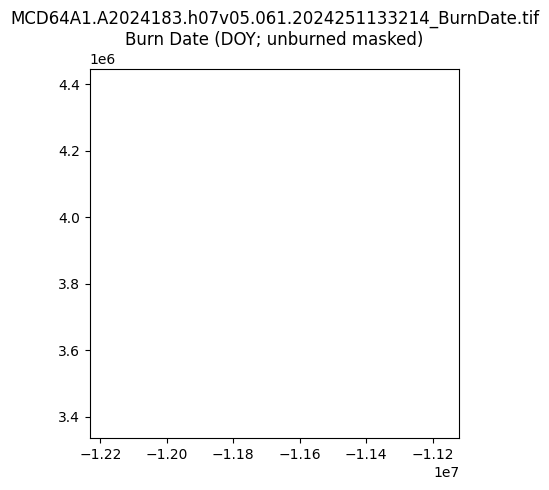

MCD64A1.A2024183.h07v05.061.2024251133214_BurnDate.tif: burned 0/5,760,000 (0.00%), DOY range None–None


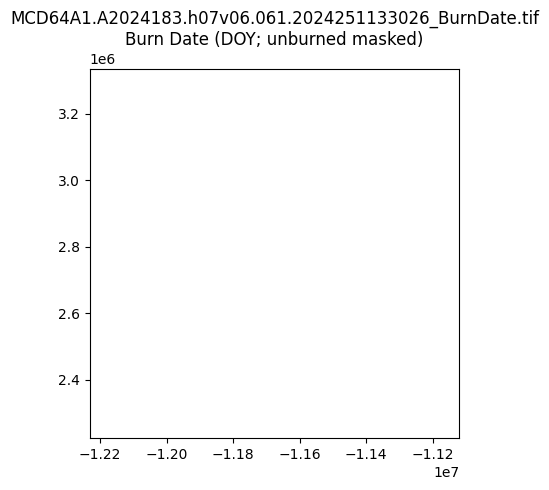

MCD64A1.A2024183.h07v06.061.2024251133026_BurnDate.tif: burned 0/5,760,000 (0.00%), DOY range None–None


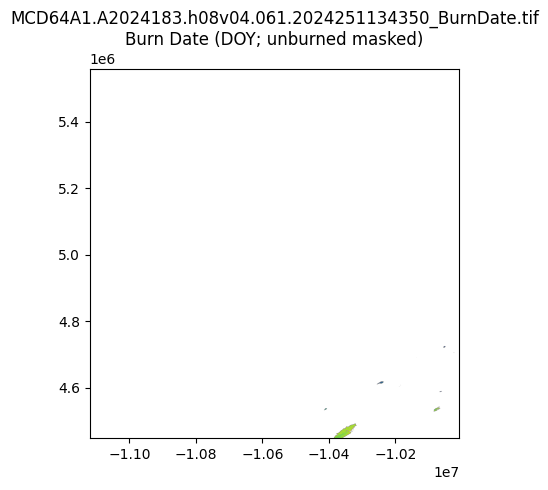

MCD64A1.A2024183.h08v04.061.2024251134350_BurnDate.tif: burned 6,149/5,760,000 (0.11%), DOY range 183–213


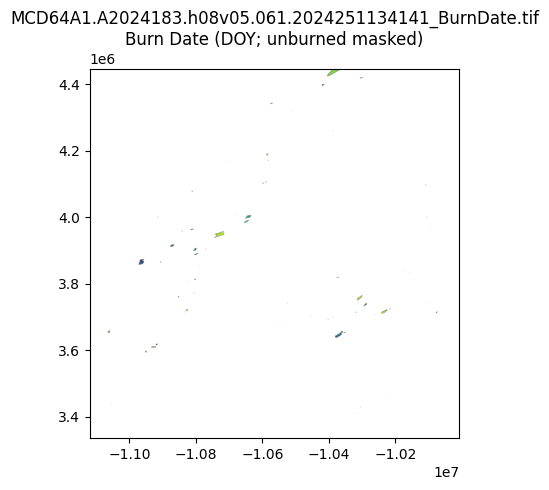

MCD64A1.A2024183.h08v05.061.2024251134141_BurnDate.tif: burned 7,905/5,760,000 (0.14%), DOY range 183–213


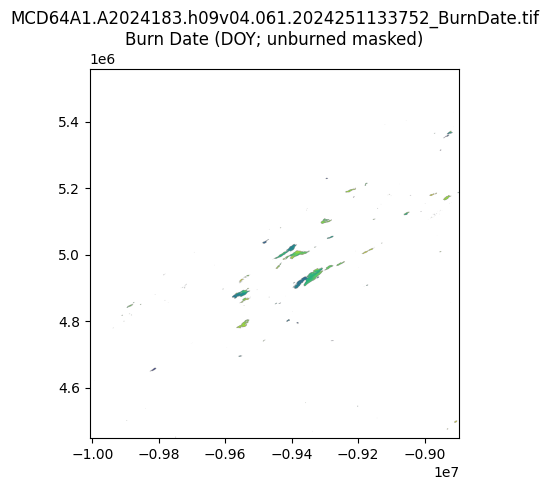

MCD64A1.A2024183.h09v04.061.2024251133752_BurnDate.tif: burned 24,423/5,760,000 (0.42%), DOY range 183–213


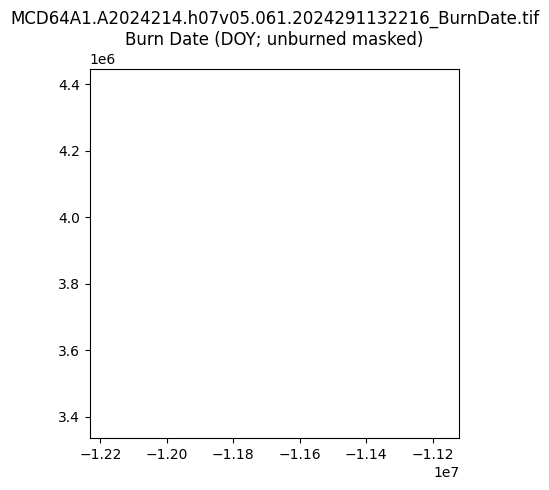

MCD64A1.A2024214.h07v05.061.2024291132216_BurnDate.tif: burned 0/5,760,000 (0.00%), DOY range None–None

Summary (first 15 rows):


,file,year,jday,tile,pixels_valid,pixels_burned,pct_burned,doy_min,doy_max,path
0,MCD64A1.A2024183.h07v05.061.2024251133214_Burn...,2024,183,h07v05,5760000,0,0.000,NaN,NaN,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
1,MCD64A1.A2024183.h07v06.061.2024251133026_Burn...,2024,183,h07v06,5760000,0,0.000,NaN,NaN,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
2,MCD64A1.A2024183.h08v04.061.2024251134350_Burn...,2024,183,h08v04,5760000,6149,0.107,183.0,213.0,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
3,MCD64A1.A2024183.h08v05.061.2024251134141_Burn...,2024,183,h08v05,5760000,7905,0.137,183.0,213.0,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
4,MCD64A1.A2024183.h09v04.061.2024251133752_Burn...,2024,183,h09v04,5760000,24423,0.424,183.0,213.0,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
5,MCD64A1.A2024214.h07v05.061.2024291132216_Burn...,2024,214,h07v05,5760000,0,0.000,NaN,NaN,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
6,MCD64A1.A2024214.h07v06.061.2024291133016_Burn...,2024,214,h07v06,5760000,0,0.000,NaN,NaN,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
7,MCD64A1.A2024214.h08v04.061.2024291133013_Burn...,2024,214,h08v04,5760000,960,0.017,214.0,243.0,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
8,MCD64A1.A2024214.h08v05.061.2024291131948_Burn...,2024,214,h08v05,5760000,1122,0.019,214.0,244.0,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...
9,MCD64A1.A2024214.h09v04.061.2024291132342_Burn...,2024,214,h09v04,5760000,12484,0.217,214.0,244.0,D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...


Saved summary → D:\606Data\MODISTera_GEOTIFF_File\MCD64A1_BurnDate_summary.csv


In [2]:
from pathlib import Path
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# --- folders ---
TIF_DIR = Path(r"D:\606Data\MODISTera_GEOTIFF_File")
SAMPLE = 6   # how many tiles to preview

# --- helpers ---
FILL_VALUES = {0, 255, 32767, 65535, 9999, -9999, -28672}

def mask_burn(arr):
    arr = arr.astype("float32", copy=False)
    # fill/unburned to NaN
    m = np.zeros(arr.shape, dtype=bool)
    for bad in FILL_VALUES:
        m |= (arr == bad)
    arr[m] = np.nan
    # keep 1..366 only
    arr[~((arr >= 1) & (arr <= 366))] = np.nan
    return arr

def parse_meta(name):
    # Example: MCD64A1.A2024183.h07v05.061.2024251133214_BurnDate.tif
    m = re.search(r"\.A(\d{4})(\d{3})\.(h\d{2}v\d{2})", name)
    if not m:
        return None, None, None
    year, jday, tile = m.group(1), m.group(2), m.group(3)
    return int(year), int(jday), tile

# --- discover tifs ---
tifs = sorted([p for p in TIF_DIR.glob("*.tif") if p.name.endswith("_BurnDate.tif")])
print(f"Found {len(tifs)} Burn Date GeoTIFF(s)")

# --- preview a few tiles + collect stats ---
rows = []
for i, fp in enumerate(tifs[:SAMPLE], 1):
    with rasterio.open(fp) as ds:
        arr = ds.read(1)
        burned = mask_burn(arr)
        vals = burned[np.isfinite(burned)]
        total_valid = int(np.isfinite(arr).sum())
        burned_count = int(vals.size)
        pct = (burned_count / total_valid * 100.0) if total_valid else 0.0
        doy_min = int(np.nanmin(vals)) if vals.size else None
        doy_max = int(np.nanmax(vals)) if vals.size else None

        # plot
        fig, ax = plt.subplots(figsize=(6, 5))
        show(burned, transform=ds.transform, ax=ax)
        ax.set_title(f"{fp.name}\nBurn Date (DOY; unburned masked)")
        plt.tight_layout(); plt.show()

        year, jday, tile = parse_meta(fp.name)
        rows.append({
            "file": fp.name,
            "year": year, "jday": jday, "tile": tile,
            "pixels_valid": total_valid,
            "pixels_burned": burned_count,
            "pct_burned": round(pct, 3),
            "doy_min": doy_min, "doy_max": doy_max,
            "path": str(fp)
        })
        print(f"{fp.name}: burned {burned_count:,}/{total_valid:,} ({pct:.2f}%), DOY range {doy_min}–{doy_max}")

# --- full summary over all tiles ---
for fp in tifs[SAMPLE:]:
    with rasterio.open(fp) as ds:
        arr = ds.read(1)
        burned = mask_burn(arr)
        vals = burned[np.isfinite(burned)]
        total_valid = int(np.isfinite(arr).sum())
        burned_count = int(vals.size)
        pct = (burned_count / total_valid * 100.0) if total_valid else 0.0
        doy_min = int(np.nanmin(vals)) if vals.size else None
        doy_max = int(np.nanmax(vals)) if vals.size else None
        year, jday, tile = parse_meta(fp.name)
        rows.append({
            "file": fp.name,
            "year": year, "jday": jday, "tile": tile,
            "pixels_valid": total_valid,
            "pixels_burned": burned_count,
            "pct_burned": round(pct, 3),
            "doy_min": doy_min, "doy_max": doy_max,
            "path": str(fp)
        })

summary = pd.DataFrame(rows).sort_values(["year","jday","tile","file"]).reset_index(drop=True)
print("\nSummary (first 15 rows):")
display(summary.head(15))

out_csv = TIF_DIR / "MCD64A1_BurnDate_summary.csv"
summary.to_csv(out_csv, index=False)
print("Saved summary →", out_csv)


### SMAP Enhanced L3 Daily 9 km (V006)

Found 2 SMAP .h5 file(s) to preview.

=== SMAP_L3_SM_P_E_20240720_R19240_001.h5 ===
Top-level groups/datasets: ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM', 'Soil_Moisture_Retrieval_Data_Polar_AM', 'Soil_Moisture_Retrieval_Data_Polar_PM'] 
Picked variable: Soil_Moisture_Retrieval_Data_AM/soil_moisture shape: (1624, 3856)
Stats: {'count': 852329, 'min': 0.019999999552965164, 'max': 0.8079595565795898, 'mean': 0.21101851761341095, 'std': 0.14117419719696045}
QA (top):
 qa_value   count
        7 2916673
       15 2485447
        0  249392
        1  234610
        8  206454
        9   81595
        5   49383
       13   38590


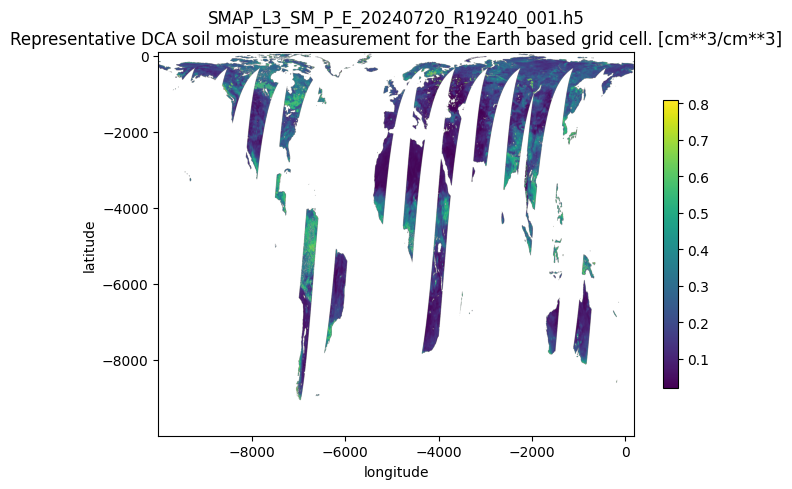


=== SMAP_L3_SM_P_E_20240721_R19240_002.h5 ===
Top-level groups/datasets: ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM', 'Soil_Moisture_Retrieval_Data_Polar_AM', 'Soil_Moisture_Retrieval_Data_Polar_PM'] 
Picked variable: Soil_Moisture_Retrieval_Data_AM/soil_moisture shape: (1624, 3856)
Stats: {'count': 814491, 'min': 0.019999999552965164, 'max': 0.9109463691711426, 'mean': 0.21082597970962524, 'std': 0.14101289212703705}
QA (top):
 qa_value   count
        7 3038358
       15 2400720
        0  241766
        1  227268
        8  186155
        9   88496
        5   41580
       13   37801


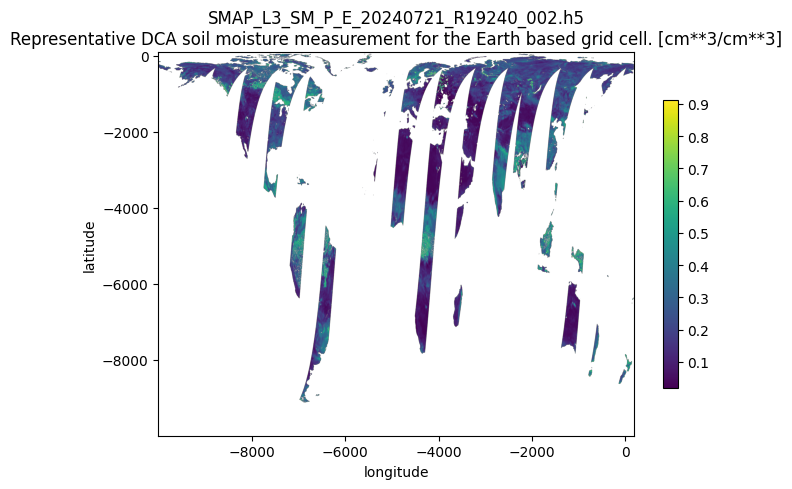

In [3]:
# --- SMAP Enhanced L3 Daily 9 km (V006) — quick opener, map preview, and stats ---
# deps: pip install h5py numpy matplotlib pandas  (xarray optional)

from pathlib import Path
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SMAP_DIR = Path(r"D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006")
SAMPLE = 2  # how many .h5 files to preview

# Candidate variable names (case-insensitive)
SCIENCE_CANDS = [
    "soil_moisture", "sm_surface", "surface_soil_moisture",
    "soil_moisture_option1", "soil_moisture_option2", "sm_surface_option1"
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
QA_CANDS  = ["retrieval_qual_flag", "quality_flag", "flag", "qa_flag"]

def find_dataset(h5, cand_list):
    """Return first dataset path in file that matches any candidate (case-insensitive, fuzzy)."""
    found = []
    def visit(name, obj):
        if isinstance(obj, h5py.Dataset):
            found.append(name)
    h5.visititems(lambda n, o: visit(n, o))
    low2orig = {n.lower(): n for n in found}
    # exact
    for c in cand_list:
        for k_low, k in low2orig.items():
            if k_low.split("/")[-1] == c.lower():
                return low2orig[k_low]
    # fuzzy contains
    for c in cand_list:
        for k_low, k in low2orig.items():
            if c.lower() in k_low:
                return low2orig[k_low]
    return None

def read_masked(dset):
    """Read dataset to float32 and apply _FillValue / missing_value if present."""
    arr = dset[()].astype("float32")
    fill = dset.attrs.get("_FillValue")
    miss = dset.attrs.get("missing_value")
    # some attributes can be arrays/scalars
    bads = set()
    for v in (fill, miss):
        if v is None: 
            continue
        v = np.array(v).ravel()
        for x in v:
            try:
                bads.add(float(x))
            except Exception:
                pass
    if bads:
        m = np.isin(arr, list(bads))
        arr[m] = np.nan
    # Also NaN-out infinities
    arr[~np.isfinite(arr)] = np.nan
    return arr

def short_stats(arr):
    v = arr[np.isfinite(arr)]
    if v.size == 0:
        return {"count": 0, "min": None, "max": None, "mean": None, "std": None}
    return {
        "count": int(v.size),
        "min": float(np.nanmin(v)),
        "max": float(np.nanmax(v)),
        "mean": float(np.nanmean(v)),
        "std": float(np.nanstd(v)),
    }

files = sorted(list(SMAP_DIR.rglob("*.h5")))[:SAMPLE]
print(f"Found {len(files)} SMAP .h5 file(s) to preview.")

if not files:
    raise SystemExit("No .h5 files found. Double-check SMAP_DIR.")

for fp in files:
    print(f"\n=== {fp.name} ===")
    with h5py.File(fp, "r") as f:
        sci_path = find_dataset(f, SCIENCE_CANDS)
        lat_path = find_dataset(f, LAT_CANDS)
        lon_path = find_dataset(f, LON_CANDS)
        qa_path  = find_dataset(f, QA_CANDS)

        # List a few datasets at the top level for awareness
        top_keys = list(f.keys())
        print("Top-level groups/datasets:", top_keys[:10], "..." if len(top_keys) > 10 else "")

        if not sci_path:
            # If no common name matched, dump some dataset names to help refine
            sample_names = []
            def collect_names(n, o):
                if isinstance(o, h5py.Dataset) and len(sample_names) < 20:
                    sample_names.append(n)
            f.visititems(lambda n, o: collect_names(n, o))
            print("⚠️ Could not auto-locate a soil moisture dataset.")
            print("Here are some dataset names I see (first 20):", sample_names)
            continue

        dset = f[sci_path]
        arr = read_masked(dset)
        print("Picked variable:", sci_path, "shape:", arr.shape)
        stats = short_stats(arr)
        print("Stats:", stats)

        # Try to get units & long_name for title
        unit = (dset.attrs.get("units") or dset.attrs.get("Units") or b"").decode("utf-8", "ignore") if isinstance(dset.attrs.get("units"), bytes) else dset.attrs.get("units")
        lname = dset.attrs.get("long_name")
        if isinstance(lname, bytes): lname = lname.decode("utf-8", "ignore")

        # Optional QA summary
        if qa_path:
            qa = read_masked(f[qa_path])
            qa_vals, qa_counts = np.unique(qa[np.isfinite(qa)].astype(int), return_counts=True) if np.isfinite(qa).any() else ([], [])
            if len(qa_vals):
                qa_df = pd.DataFrame({"qa_value": qa_vals, "count": qa_counts}).sort_values("count", ascending=False)
                print("QA (top):")
                print(qa_df.head(10).to_string(index=False))
            else:
                print("QA present but all masked/non-finite.")
        else:
            print("No obvious QA dataset found (looked for:", QA_CANDS, ").")

        # Geolocation (if file ships 2D lat/lon). If not present, show in grid space.
        lat = f[lat_path][()].astype("float32") if lat_path else None
        lon = f[lon_path][()].astype("float32") if lon_path else None

        # Simple preview
        title = (lname or sci_path)
        if unit: title += f" [{unit}]"

        plt.figure(figsize=(7,5))
        if lat is not None and lon is not None and lat.shape == arr.shape == lon.shape:
            # If geolocated arrays exist, show with extent (min/max), or fall back to scatter if wildly irregular
            try:
                # if lat/lon are monotonic by axis, imshow with extent works
                lat_min, lat_max = float(np.nanmin(lat)), float(np.nanmax(lat))
                lon_min, lon_max = float(np.nanmin(lon)), float(np.nanmax(lon))
                extent = [lon_min, lon_max, lat_min, lat_max]
                plt.imshow(arr, origin="upper", extent=extent, aspect="auto")
                plt.xlabel("longitude"); plt.ylabel("latitude")
            except Exception:
                # fallback: scatter a decimated grid
                step = max(1, int(max(arr.shape) / 1000))  # decimate if big
                m = np.isfinite(arr)
                yx = np.where(m)
                ys, xs = yx[0][::step], yx[1][::step]
                plt.scatter(lon[ys, xs], lat[ys, xs], c=arr[ys, xs], s=3, alpha=0.8)
                plt.xlabel("longitude"); plt.ylabel("latitude")
        else:
            # Unknown projection (EASE-Grid). Show grid-space preview.
            plt.imshow(arr, origin="upper", aspect="equal")
            plt.xlabel("x (grid)"); plt.ylabel("y (grid)")

        plt.title(fp.name + "\n" + title)
        plt.colorbar(shrink=0.75)
        plt.tight_layout()
        plt.show()


### OPERA Dataset

Found 10450 GeoTIFF(s) under D:\606Data\OPERA_Dataset (processing first 20)

[1/20] OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540Z_20240814T032330Z_L9_30_v1_DATA-MASK.tif
  shape=3660x3660  dtype=uint8  crs=EPSG:32610  nodata=None
  top values:
 value    count
     0 13382542
     2    12993
     1       65
  nonzero pixels: 13,058 / 13,395,600  (0.097%)  [looks binary mask]

[2/20] OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540Z_20240814T032330Z_L9_30_v1_GEN-ANOM-MAX.tif
  shape=3660x3660  dtype=int16  crs=EPSG:32610  nodata=-1.0
  top values:
 value    count
     0 13395511
    16        8
    15        8
    29        6
    20        6
    21        5
    22        5
    17        5
    19        4
 32000        4
    18        3
    25        3
  nonzero pixels: 89 / 13,395,600  (0.001%)

[3/20] OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540Z_20240814T032330Z_L9_30_v1_GEN-ANOM.tif
  shape=3660x3660  dtype=int16  crs=EPSG:32610  nodata=-1.0
  top values:
 value  count
     1    340

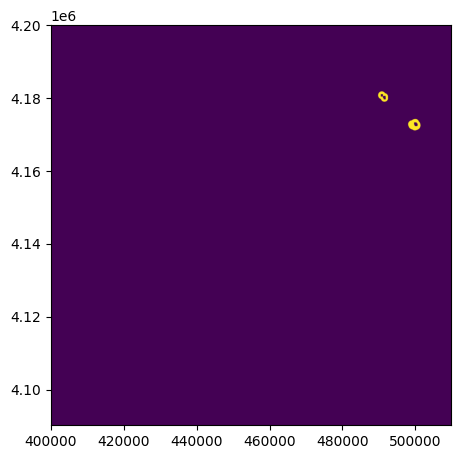

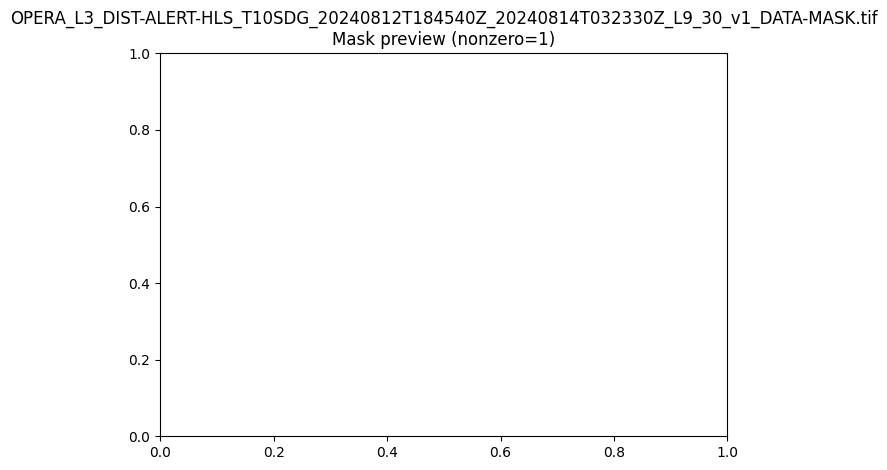

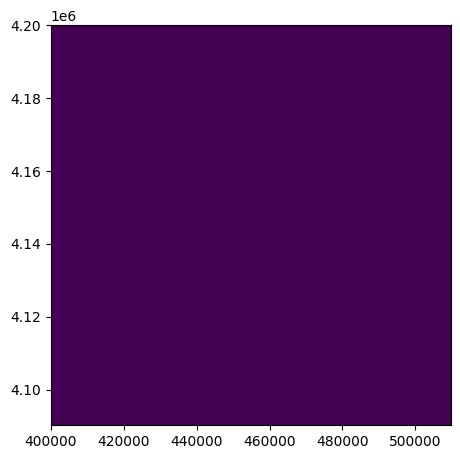

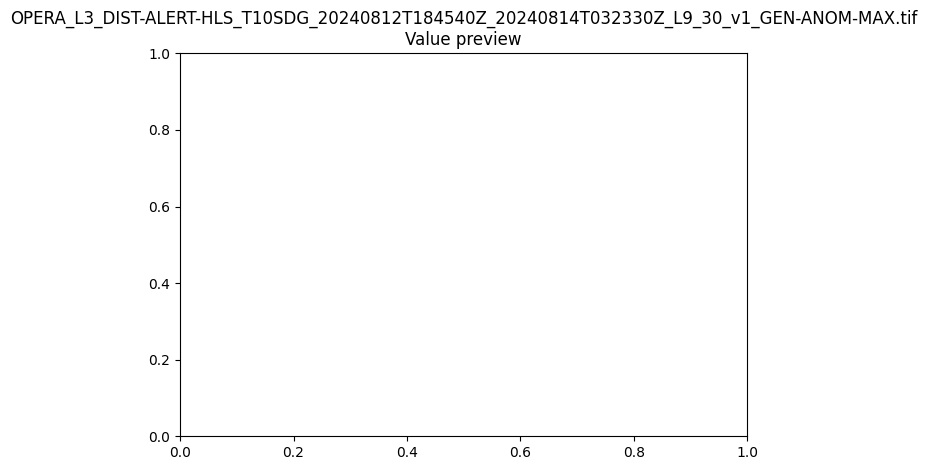

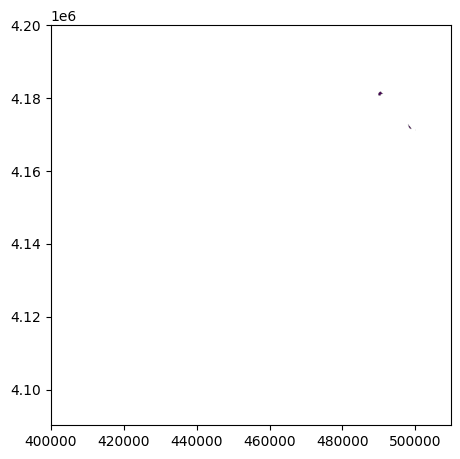

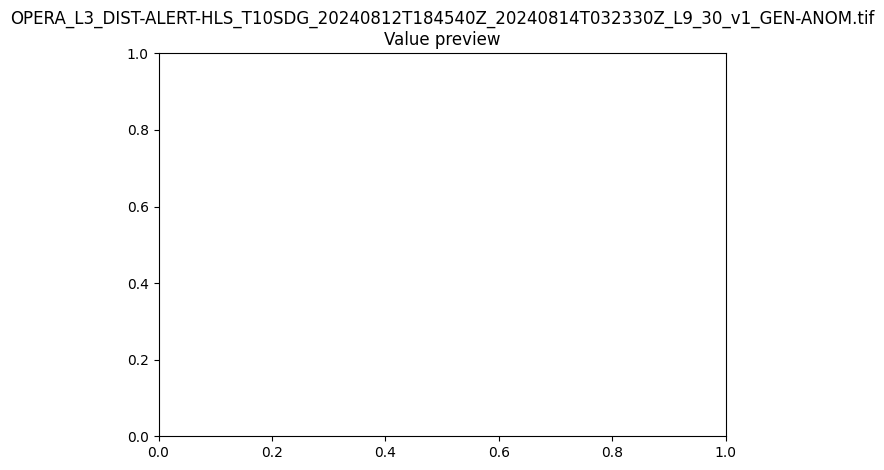

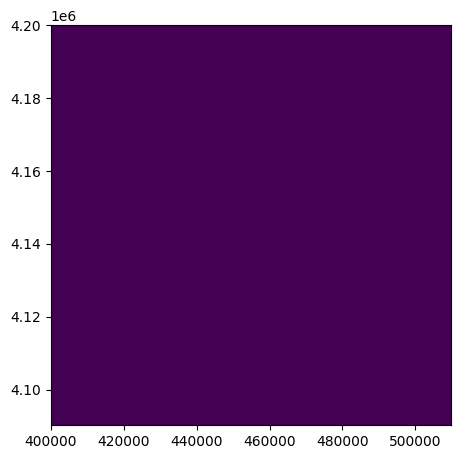

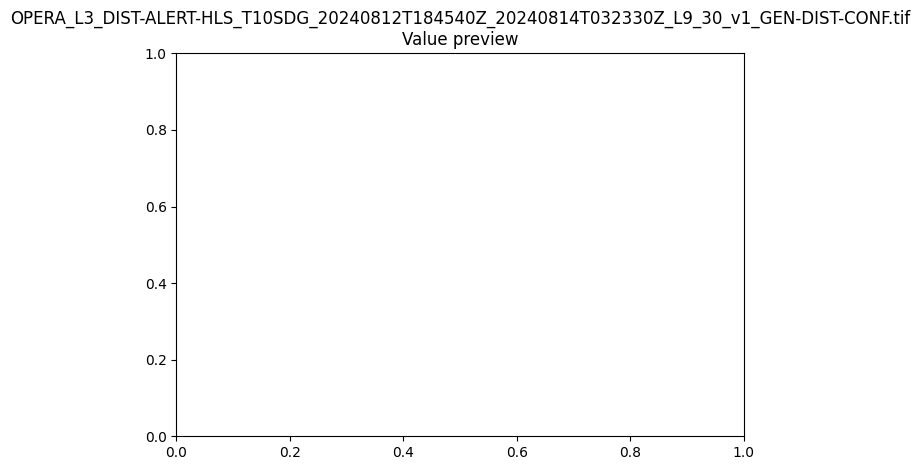

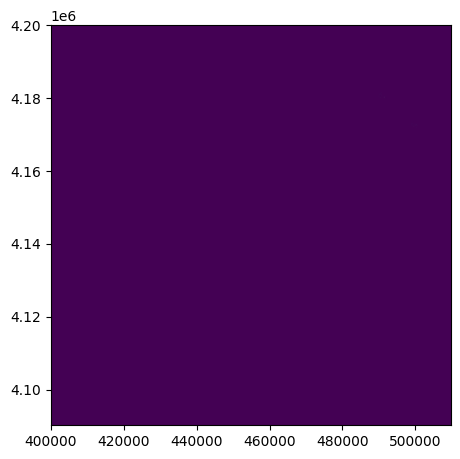

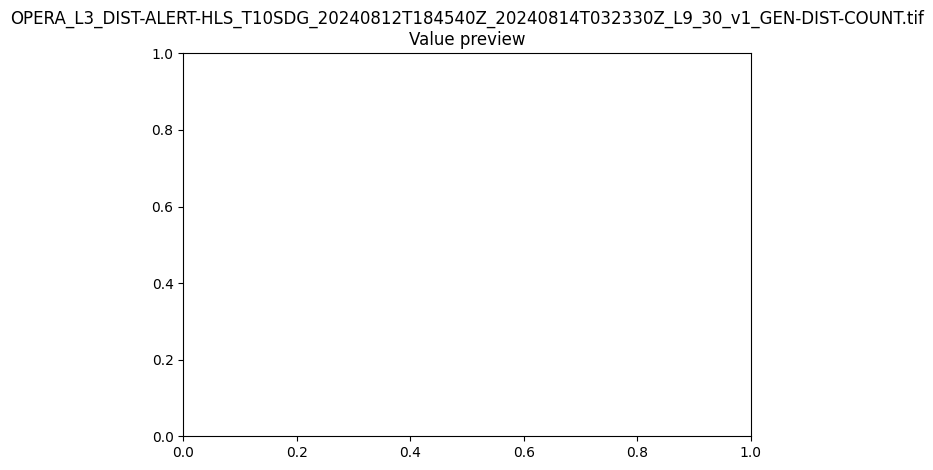

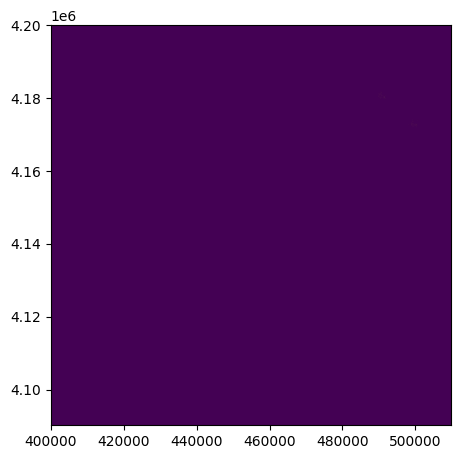

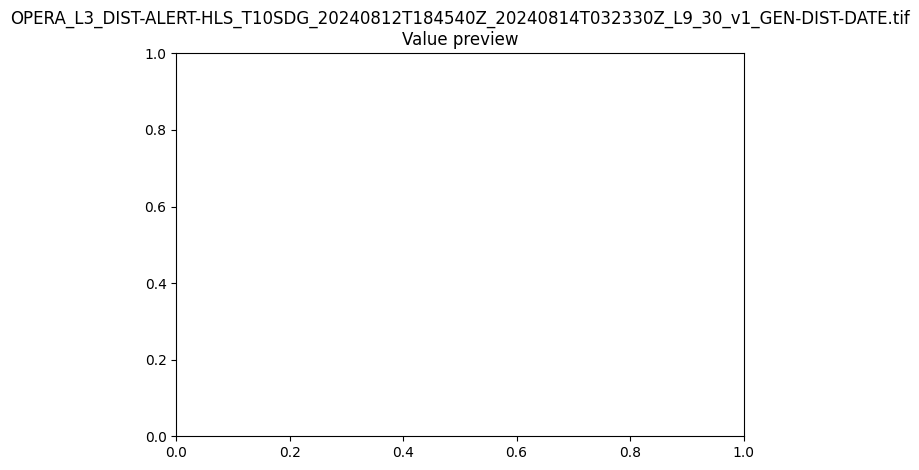


Summary (first 20 rows of summary table):


,file,path,height,width,dtype,crs,nodata,valid_pixels,nonzero_pixels,pct_nonzero,looks_binary_mask
0,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,uint8,EPSG:32610,NaN,13395600,13058,0.0975,True
1,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,int16,EPSG:32610,-1.0,13395600,89,0.0007,False
2,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,int16,EPSG:32610,-1.0,1212,1203,99.2574,False
3,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,int16,EPSG:32610,-1.0,13395600,89,0.0007,False
4,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,uint8,EPSG:32610,255.0,13395600,89,0.0007,False
5,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,int16,EPSG:32610,-1.0,13395600,89,0.0007,False
6,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,int16,EPSG:32610,-1.0,13395600,89,0.0007,False
7,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,uint8,EPSG:32610,255.0,13395600,89,0.0007,False
8,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,int16,EPSG:32610,-1.0,13395600,13395600,100.0000,False
9,OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...,D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...,3660,3660,uint8,EPSG:32610,255.0,41234,29,0.0703,False


Saved summary → D:\606Data\OPERA_Dataset\OPERA_summary_firstN.csv


In [6]:
# --- OPERA GeoTIFF inspector: value counts, previews, and summary CSV (first N files only) ---
# deps: pip install rasterio numpy pandas matplotlib

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

OPERA_DIR  = Path(r"D:\606Data\OPERA_Dataset")
MAX_FILES  = 20   # analyze at most this many files
SAMPLE     = 6    # show maps for at most this many (<= MAX_FILES)
TOP_VALUES = 12
SAVE_VALUE_COUNTS = False

FILL_CANDIDATES = {255, 32767, 65535, 9999, -9999, -28672}

def mask_fills_inplace(arr, nodata, fill_values):
    """Mask nodata and common fill codes in-place by setting them to NaN."""
    # nodata
    if nodata is not None:
        try:
            if np.issubdtype(arr.dtype, np.integer):
                # compare as integer
                arr[arr == np.array(nodata, dtype=arr.dtype)] = np.nan
            else:
                arr[arr == float(nodata)] = np.nan
        except Exception:
            pass

    # other fills
    if np.issubdtype(arr.dtype, np.integer):
        info = np.iinfo(arr.dtype)
        for bad in fill_values:
            if info.min <= bad <= info.max:
                arr[arr == np.array(bad, dtype=arr.dtype)] = np.nan
    else:
        # floating types: just compare as float
        for bad in fill_values:
            arr[arr == float(bad)] = np.nan

# find and cap to first N
all_tifs = sorted(list(OPERA_DIR.rglob("*.tif")) + list(OPERA_DIR.rglob("*.tiff")))
tifs = all_tifs[:MAX_FILES]
print(f"Found {len(all_tifs)} GeoTIFF(s) under {OPERA_DIR} (processing first {len(tifs)})")
if not tifs:
    raise SystemExit("No GeoTIFFs found. Check the folder path.")

rows = []
for i, fp in enumerate(tifs, 1):
    with rasterio.open(fp) as ds:
        arr = ds.read(1)
        nodata = ds.nodata
        dtype = ds.dtypes[0]
        h, w = ds.height, ds.width

        # build validity mask, then compute counts on valid pixels
        mask = np.zeros(arr.shape, dtype=bool)

        # create a temp float array for masking & stats (keeps NaN handling simple)
        arrf = arr.astype("float32", copy=True)
        mask_fills_inplace(arrf, nodata, FILL_CANDIDATES)
        mask |= ~np.isfinite(arrf)
        valid = ~mask

        if valid.any():
            vals, counts = np.unique(arr[valid], return_counts=True)  # use original dtype for value table
            order = np.argsort(counts)[::-1]
            vals, counts = vals[order], counts[order]
            top_df = pd.DataFrame({"value": vals[:TOP_VALUES], "count": counts[:TOP_VALUES]})

            unique_set = set(vals.tolist())
            # heuristic binary check (ignores fill already masked)
            is_binary01 = unique_set.issubset({0, 1}) or (
                unique_set.issubset({0, 1, 2})
                and (2 in unique_set)
                and counts[vals.tolist().index(2)] < 0.01 * valid.sum()
            )

            nz = int((arrf[valid] != 0).sum())
            pct_nz = 100.0 * nz / int(valid.sum())
        else:
            top_df = pd.DataFrame({"value": [], "count": []})
            is_binary01, nz, pct_nz = False, 0, 0.0

        # print quick info
        print(f"\n[{i}/{len(tifs)}] {fp.name}")
        print(f"  shape={h}x{w}  dtype={dtype}  crs={ds.crs}  nodata={nodata}")
        print("  top values:")
        print(top_df.to_string(index=False) if len(top_df) else "  (no finite/valid pixels)")
        if valid.any():
            print(f"  nonzero pixels: {nz:,} / {int(valid.sum()):,}  ({pct_nz:.3f}%)"
                  + ("  [looks binary mask]" if is_binary01 else ""))

        if SAVE_VALUE_COUNTS and valid.any():
            out_counts = fp.with_suffix(".value_counts.csv")
            pd.DataFrame({"value": vals, "count": counts}).to_csv(out_counts, index=False)

        rows.append({
            "file": fp.name,
            "path": str(fp),
            "height": h, "width": w, "dtype": dtype,
            "crs": str(ds.crs),
            "nodata": nodata,
            "valid_pixels": int(valid.sum()),
            "nonzero_pixels": nz,
            "pct_nonzero": round(pct_nz, 4),
            "looks_binary_mask": bool(is_binary01)
        })

# preview a few maps from the capped list
for fp in tifs[:min(SAMPLE, len(tifs))]:
    with rasterio.open(fp) as ds:
        arr = ds.read(1).astype("float32", copy=True)
        mask_fills_inplace(arr, ds.nodata, FILL_CANDIDATES)

        finite = np.isfinite(arr)
        unique_vals = np.unique(arr[finite]).tolist() if finite.any() else []
        binaryish = len(unique_vals) <= 3 and set(int(v) for v in unique_vals if v == v).issubset({0, 1, 2})

        plt.figure(figsize=(6.2, 5.2))
        if binaryish:
            show((arr != 0).astype("float32"), transform=ds.transform)
            plt.title(fp.name + "\nMask preview (nonzero=1)")
        else:
            show(arr, transform=ds.transform)
            plt.title(fp.name + "\nValue preview")
        plt.tight_layout(); plt.show()

# summary only for the files we processed (first N)
summary = pd.DataFrame(rows).sort_values("file").reset_index(drop=True)
print("\nSummary (first 20 rows of summary table):")
display(summary.head(20))

out_csv = OPERA_DIR / "OPERA_summary_firstN.csv"
summary.to_csv(out_csv, index=False)
print("Saved summary →", out_csv)


### SMAP L3 Daily 36 km (V009)

Found 2 SMAP .h5 file(s) to preview.

=== SMAP_L3_SM_P_20240720_R19240_001.h5 ===
Top-level groups/datasets: ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM'] 
Picked variable: Soil_Moisture_Retrieval_Data_AM/soil_moisture | shape: (406, 964)
Stats: {'count': 53263, 'min': 0.019999999552965164, 'max': 0.748695433139801, 'mean': 0.20944444835186005, 'std': 0.1389470249414444} | units: cm**3/cm**3
QA (top values):
 qa_value  count
        7 178769
       15 159040
        0  15005
        1  15000
        8  12906
        9   5678
        5   2781
       13   2205


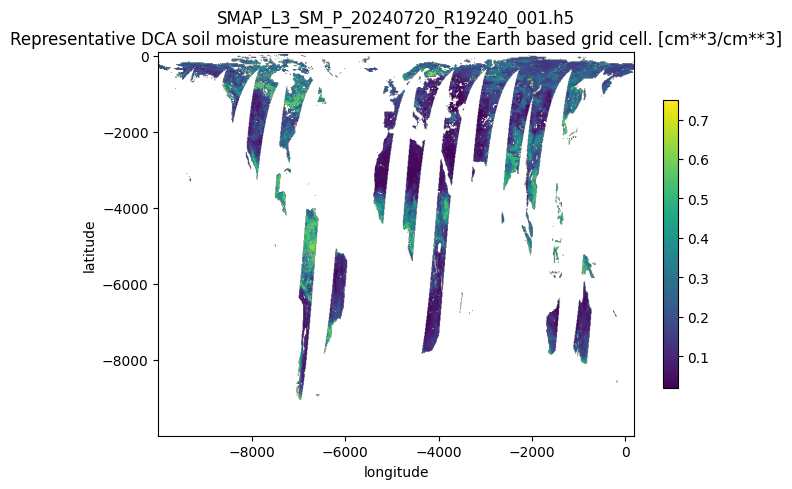


=== SMAP_L3_SM_P_20240721_R19240_002.h5 ===
Top-level groups/datasets: ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM'] 
Picked variable: Soil_Moisture_Retrieval_Data_AM/soil_moisture | shape: (406, 964)
Stats: {'count': 50845, 'min': 0.019999999552965164, 'max': 0.8185527324676514, 'mean': 0.20902147889137268, 'std': 0.13878007233142853} | units: cm**3/cm**3
QA (top values):
 qa_value  count
        7 186623
       15 153550
        1  14562
        0  14503
        8  11684
        9   6058
        5   2317
       13   2087


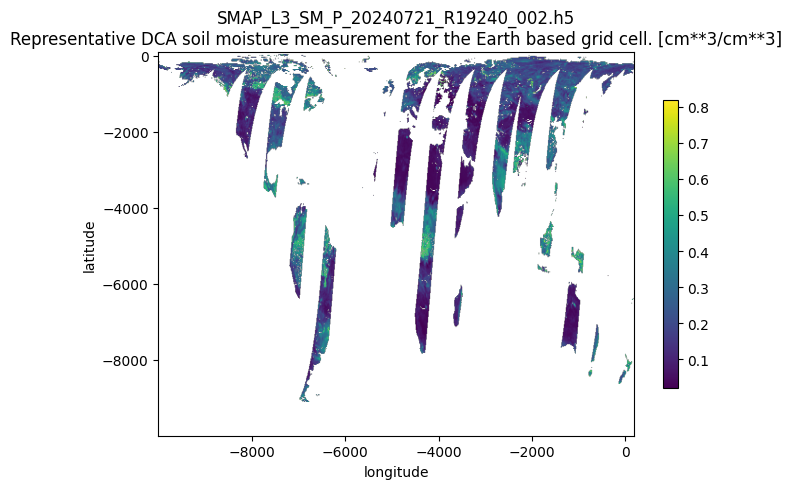

In [7]:
# --- SMAP L3 Radiometer Global Daily 36km (V009) — quick inspector & preview ---
# deps: pip install h5py numpy matplotlib pandas

from pathlib import Path
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SMAP_DIR = Path(r"D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009")
SAMPLE   = 2       # how many .h5 files to preview
WRITE_CSV_SUMMARY = False

# Candidate dataset names (case-insensitive; match by basename or substring)
SCIENCE_CANDS = [
    # common SMAP soil moisture names
    "soil_moisture", "sm_surface", "surface_soil_moisture",
    "soil_moisture_am", "soil_moisture_pm",
    "soil_moisture_option1", "soil_moisture_option2",
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
QA_CANDS  = [
    "retrieval_qual_flag", "quality_flag", "retrieval_quality_flag",
    "flag", "qa_flag", "retrieval_qual_flag_am", "retrieval_qual_flag_pm"
]

def list_all_datasets(h5):
    paths = []
    def visit(name, obj):
        if isinstance(obj, h5py.Dataset):
            paths.append(name)
    h5.visititems(lambda n, o: visit(n, o))
    return paths

def find_dataset(h5, cand_list):
    """Return first dataset path matching one of the candidates (case-insensitive)."""
    all_ds = list_all_datasets(h5)
    low2orig = {p.lower(): p for p in all_ds}
    # exact match on basename
    for c in cand_list:
        c_low = c.lower()
        for p in all_ds:
            if p.split("/")[-1].lower() == c_low:
                return p
    # fuzzy contains anywhere in path
    for c in cand_list:
        c_low = c.lower()
        for p in all_ds:
            if c_low in p.lower():
                return p
    return None

def apply_scale_offset(arr, dset):
    """Apply CF-style scale_factor/add_offset if present."""
    sf = dset.attrs.get("scale_factor")
    ao = dset.attrs.get("add_offset")
    # bytes → numbers if necessary
    def as_float(x):
        try:
            return float(np.array(x).ravel()[0])
        except Exception:
            return None
    sf = as_float(sf)
    ao = as_float(ao)
    if sf is not None or ao is not None:
        arr = arr.astype("float32", copy=False)
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        arr = arr * sf + ao
    return arr

def read_masked(dset):
    """Read dataset, apply scale/offset, mask _FillValue/missing_value & non-finite."""
    arr = dset[()]  # keep original dtype first
    arr = apply_scale_offset(arr, dset)
    arr = arr.astype("float32", copy=False)
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = dset.attrs.get(key)
        if v is None: 
            continue
        v = np.array(v).ravel()
        for x in v:
            try:
                bads.add(float(x))
            except Exception:
                pass
    if bads:
        m = np.isin(arr, list(bads))
        arr[m] = np.nan
    arr[~np.isfinite(arr)] = np.nan
    return arr

def short_stats(arr):
    v = arr[np.isfinite(arr)]
    if v.size == 0:
        return {"count": 0, "min": None, "max": None, "mean": None, "std": None}
    return {
        "count": int(v.size),
        "min": float(np.nanmin(v)),
        "max": float(np.nanmax(v)),
        "mean": float(np.nanmean(v)),
        "std": float(np.nanstd(v)),
    }

files = sorted(SMAP_DIR.rglob("*.h5"))[:SAMPLE]
print(f"Found {len(files)} SMAP .h5 file(s) to preview.")
if not files:
    raise SystemExit("No .h5 files found. Check SMAP_DIR path.")

summary_rows = []

for fp in files:
    print(f"\n=== {fp.name} ===")
    with h5py.File(fp, "r") as f:
        # locate datasets
        sci_path = find_dataset(f, SCIENCE_CANDS)
        lat_path = find_dataset(f, LAT_CANDS)
        lon_path = find_dataset(f, LON_CANDS)
        qa_path  = find_dataset(f, QA_CANDS)

        # show a few top-level keys for orientation
        print("Top-level groups/datasets:", list(f.keys())[:10], "..." if len(f.keys()) > 10 else "")

        if not sci_path:
            # help you discover the right variable name
            ds_names = list_all_datasets(f)[:25]
            print("⚠️ Could not auto-locate a soil moisture dataset.")
            print("Here are some dataset names I see (first 25):")
            for n in ds_names: print("  -", n)
            continue

        dset = f[sci_path]
        sm = read_masked(dset)
        unit = dset.attrs.get("units") or dset.attrs.get("Units")
        if isinstance(unit, bytes):
            unit = unit.decode("utf-8", "ignore")
        lname = dset.attrs.get("long_name")
        if isinstance(lname, bytes):
            lname = lname.decode("utf-8", "ignore")

        stats = short_stats(sm)
        print("Picked variable:", sci_path, "| shape:", sm.shape)
        print("Stats:", stats, "| units:", unit or "(none)")

        # QA flags (optional)
        if qa_path:
            qa = read_masked(f[qa_path])
            if np.isfinite(qa).any():
                vals, counts = np.unique(qa[np.isfinite(qa)].astype(int), return_counts=True)
                order = np.argsort(counts)[::-1]
                vals, counts = vals[order], counts[order]
                top_df = pd.DataFrame({"qa_value": vals[:10], "count": counts[:10]})
                print("QA (top values):")
                print(top_df.to_string(index=False))
            else:
                print("QA present but fully masked/non-finite.")
        else:
            print("No obvious QA dataset found (looked for:", QA_CANDS, ").")

        # Geolocation
        lat = f[lat_path][()].astype("float32") if lat_path else None
        lon = f[lon_path][()].astype("float32") if lon_path else None

        # --- Preview plot ---
        title = (lname or sci_path)
        if unit: title += f" [{unit}]"
        plt.figure(figsize=(7,5))
        if lat is not None and lon is not None and lat.shape == sm.shape == lon.shape:
            try:
                extent = [float(np.nanmin(lon)), float(np.nanmax(lon)),
                          float(np.nanmin(lat)), float(np.nanmax(lat))]
                plt.imshow(sm, origin="upper", extent=extent, aspect="auto")
                plt.xlabel("longitude"); plt.ylabel("latitude")
            except Exception:
                # fallback to scatter on decimated grid if extent logic fails
                m = np.isfinite(sm)
                y, x = np.where(m)
                step = max(1, int(max(sm.shape)/1000))
                y, x = y[::step], x[::step]
                plt.scatter(lon[y, x], lat[y, x], c=sm[y, x], s=3, alpha=0.8)
                plt.xlabel("longitude"); plt.ylabel("latitude")
        else:
            # EASE-Grid preview in grid space (no reprojection)
            plt.imshow(sm, origin="upper", aspect="equal")
            plt.xlabel("x (grid)"); plt.ylabel("y (grid)")
        plt.title(fp.name + "\n" + title)
        plt.colorbar(shrink=0.75)
        plt.tight_layout(); plt.show()

        # collect small summary row
        summary_rows.append({
            "file": fp.name,
            "path": str(fp),
            "variable": sci_path,
            "units": unit,
            "count": stats["count"],
            "min": stats["min"],
            "max": stats["max"],
            "mean": stats["mean"],
            "std": stats["std"],
            "has_latlon": bool(lat_path and lon_path),
            "qa_var": qa_path or ""
        })

# optional CSV summary
if WRITE_CSV_SUMMARY and summary_rows:
    out_csv = SMAP_DIR / "SMAP_L3_36km_summary.csv"
    pd.DataFrame(summary_rows).to_csv(out_csv, index=False)
    print("Saved summary →", out_csv)


### SMAP/Sentinel-1 L2 Radiometer–Radar Scene, 3 km EASE-Grid (V003)

In [ ]:
# --- SMAP/Sentinel-1 L2 Radiometer–Radar Scene, 3 km EASE-Grid (V003) ---
# random-sample inspector & preview for .h5 granules
# deps: pip install h5py numpy matplotlib pandas

from pathlib import Path
import random
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path(r"D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003")
SAMPLE_K = 2           # how many random files to preview
RANDOM_SEED = 42       # set to None for non-reproducible randomness
WRITE_CSV_SUMMARY = False

# Candidate names (case-insensitive; matched by basename or substring)
SCIENCE_CANDS = [
    "soil_moisture", "surface_soil_moisture", "sm_surface",
    "soil_moisture_ap", "soil_moisture_aa", "soil_moisture_radar",
    "soil_moisture_option1", "soil_moisture_option2",
    "retrieved_soil_moisture"
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
QA_CANDS  = [
    "retrieval_qual_flag", "retrieval_quality_flag", "quality_flag",
    "surface_flag", "processing_flag", "radar_quality_flag",
    "tb_quality_flag", "s1_quality_flag"
]
TIME_CANDS = ["scene_center_time", "tb_time_utc", "time_utc", "time"]

def list_all_datasets(h5):
    paths = []
    def visit(name, obj):
        if isinstance(obj, h5py.Dataset):
            paths.append(name)
    h5.visititems(lambda n, o: visit(n, o))
    return paths

def find_dataset(h5, cand_list):
    all_ds = list_all_datasets(h5)
    # exact match on basename
    for c in cand_list:
        c_low = c.lower()
        for p in all_ds:
            if p.split("/")[-1].lower() == c_low:
                return p
    # fuzzy contains anywhere in path
    for c in cand_list:
        c_low = c.lower()
        for p in all_ds:
            if c_low in p.lower():
                return p
    return None

def _as_float_scalar(x):
    try: return float(np.array(x).ravel()[0])
    except Exception: return None

def apply_scale_offset(arr, dset):
    sf = _as_float_scalar(dset.attrs.get("scale_factor"))
    ao = _as_float_scalar(dset.attrs.get("add_offset"))
    if sf is not None or ao is not None:
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        arr = arr.astype("float32", copy=False)
        arr = arr * sf + ao
    return arr

def read_masked(dset):
    arr = dset[()]
    arr = apply_scale_offset(arr, dset)
    arr = arr.astype("float32", copy=False)
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = dset.attrs.get(key)
        if v is None: continue
        for x in np.array(v).ravel():
            try: bads.add(float(x))
            except Exception: pass
    if bads:
        arr[np.isin(arr, list(bads))] = np.nan
    arr[~np.isfinite(arr)] = np.nan
    return arr

def short_stats(arr):
    v = arr[np.isfinite(arr)]
    return {"count": int(v.size),
            "min": float(np.nanmin(v)) if v.size else None,
            "max": float(np.nanmax(v)) if v.size else None,
            "mean": float(np.nanmean(v)) if v.size else None,
            "std": float(np.nanstd(v)) if v.size else None}

# --- pick random files ---
all_files = sorted(DATA_DIR.rglob("*.h5"))
print(f"Found {len(all_files)} .h5 file(s).")
if not all_files:
    raise SystemExit("No .h5 files found. Check DATA_DIR path.")

if RANDOM_SEED is not None:
    random.seed(RANDOM_SEED)
files = random.sample(all_files, k=min(SAMPLE_K, len(all_files)))
print("Random picks:")
for f in files: print(" -", f.name)

summary = []

for fp in files:
    print(f"\n=== {fp.name} ===")
    with h5py.File(fp, "r") as f:
        top = list(f.keys())
        print("Top-level groups/datasets:", top[:10], "..." if len(top) > 10 else "")

        sci_path = find_dataset(f, SCIENCE_CANDS)
        lat_path = find_dataset(f, LAT_CANDS)
        lon_path = find_dataset(f, LON_CANDS)
        qa_path  = find_dataset(f, QA_CANDS)
        time_path= find_dataset(f, TIME_CANDS)

        if not sci_path:
            ds_names = list_all_datasets(f)[:30]
            print("⚠️ Could not auto-locate a soil moisture dataset. First 30 datasets:")
            for n in ds_names: print("  -", n)
            continue

        dset = f[sci_path]
        sm = read_masked(dset)
        unit = dset.attrs.get("units") or dset.attrs.get("Units")
        unit = unit.decode("utf-8","ignore") if isinstance(unit, bytes) else unit
        lname = dset.attrs.get("long_name")
        lname = lname.decode("utf-8","ignore") if isinstance(lname, bytes) else lname
        stats = short_stats(sm)

        print("Picked variable:", sci_path, "| shape:", sm.shape)
        print("Stats:", stats, "| units:", unit or "(none)")

        if qa_path:
            qa = read_masked(f[qa_path])
            if np.isfinite(qa).any():
                vals, counts = np.unique(qa[np.isfinite(qa)].astype(int), return_counts=True)
                order = np.argsort(counts)[::-1]
                print("QA (top values):")
                print(pd.DataFrame({"qa_value": vals[order][:10], "count": counts[order][:10]}).to_string(index=False))
            else:
                print("QA present but fully masked/non-finite.")
        else:
            print("No obvious QA dataset found.")

        lat = f[lat_path][()].astype("float32") if lat_path else None
        lon = f[lon_path][()].astype("float32") if lon_path else None

        # preview
        title = (lname or sci_path) + (f" [{unit}]" if unit else "")
        plt.figure(figsize=(7,5))
        if (lat is not None) and (lon is not None) and lat.shape == sm.shape == lon.shape:
            try:
                extent = [float(np.nanmin(lon)), float(np.nanmax(lon)),
                          float(np.nanmin(lat)), float(np.nanmax(lat))]
                plt.imshow(sm, origin="upper", extent=extent, aspect="auto")
                plt.xlabel("longitude"); plt.ylabel("latitude")
            except Exception:
                m = np.isfinite(sm); y,x = np.where(m)
                step = max(1, int(max(sm.shape)/1000)); y,x = y[::step], x[::step]
                plt.scatter(lon[y,x], lat[y,x], c=sm[y,x], s=3, alpha=0.8)
                plt.xlabel("longitude"); plt.ylabel("latitude")
        else:
            plt.imshow(sm, origin="upper", aspect="equal")
            plt.xlabel("x (grid)"); plt.ylabel("y (grid)")
        plt.title(fp.name + "\n" + title)
        plt.colorbar(shrink=0.75)
        plt.tight_layout(); plt.show()

        summary.append({
            "file": fp.name, "path": str(fp), "variable": sci_path,
            "units": unit or "", **stats,
            "has_latlon": bool(lat_path and lon_path),
            "qa_var": qa_path or "", "time": str(np.array(f[time_path][()]).ravel()[0]) if time_path else ""
        })

if WRITE_CSV_SUMMARY and summary:
    out_csv = DATA_DIR / "SMAP_S1_L2_3km_summary.csv"
    pd.DataFrame(summary).to_csv(out_csv, index=False)
    print("Saved summary →", out_csv)


### VIIRS NPP Thermal Anomalies & Fire Daily L3 1 km SIN Grid (V002)

Found 135 .h5 granule(s)
Random picks:
 - VNP14A1.A2024223.h08v04.002.2024226182033.h5
 - VNP14A1.A2024214.h08v05.002.2024221162948.h5

=== VNP14A1.A2024223.h08v04.002.2024226182033.h5 ===
Top-level groups: ['HDFEOS', 'HDFEOS INFORMATION'] 
FireMask (top values):
 FireMask_value   count
              3 1264626
              5  133495
              4   41863
              9       9
              8       6
              7       1
FRP stats (HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields/MaxFRP): {'count': 16, 'min': 3.799999952316284, 'max': 114.20000457763672, 'mean': 35.96875, 'std': 35.57577896118164}


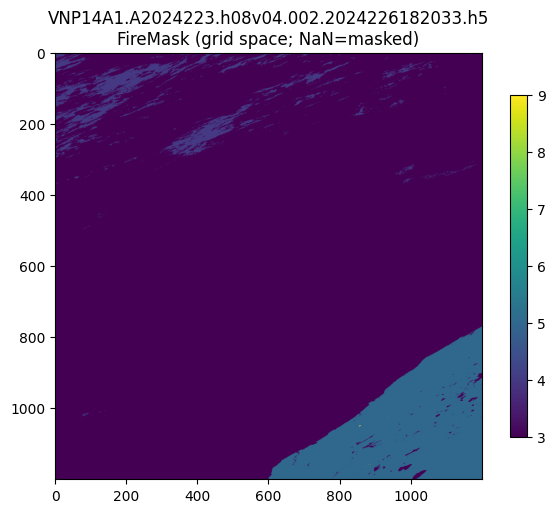

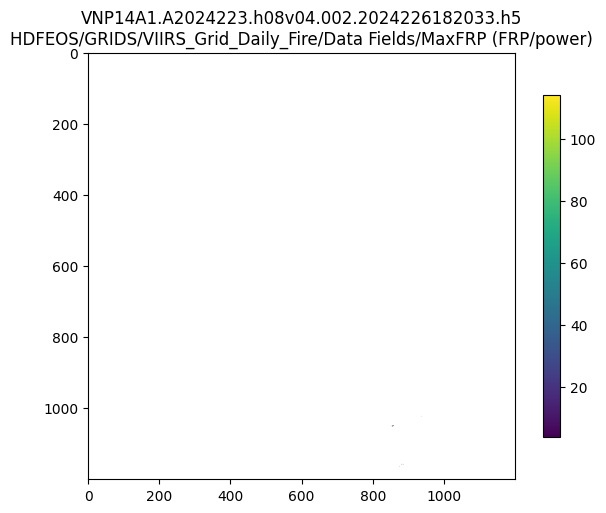

,file,mask_path,frp_path,qf_path,mask_unique,frp_count,frp_min,frp_max,frp_mean
0,VNP14A1.A2024223.h08v04.002.2024226182033.h5,HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...,HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...,,6,16,3.8,114.200005,35.96875



=== VNP14A1.A2024214.h08v05.002.2024221162948.h5 ===
Top-level groups: ['HDFEOS', 'HDFEOS INFORMATION'] 
FireMask (top values):
 FireMask_value   count
              5 1087151
              3  318129
              4   34695
              9      15
              8       8
              7       2
FRP stats (HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields/MaxFRP): {'count': 25, 'min': 5.800000190734863, 'max': 243.5, 'mean': 42.65199661254883, 'std': 51.7050895690918}


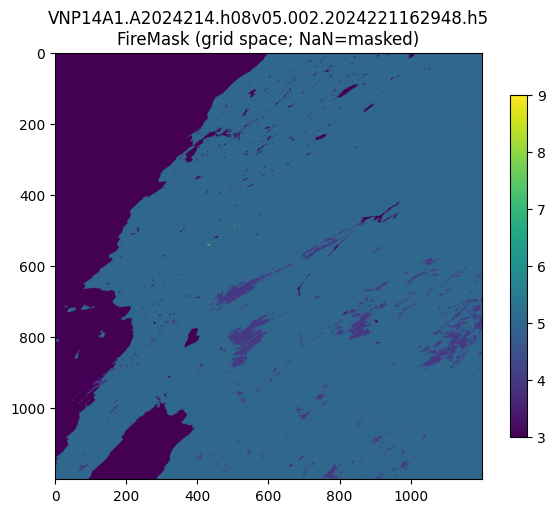

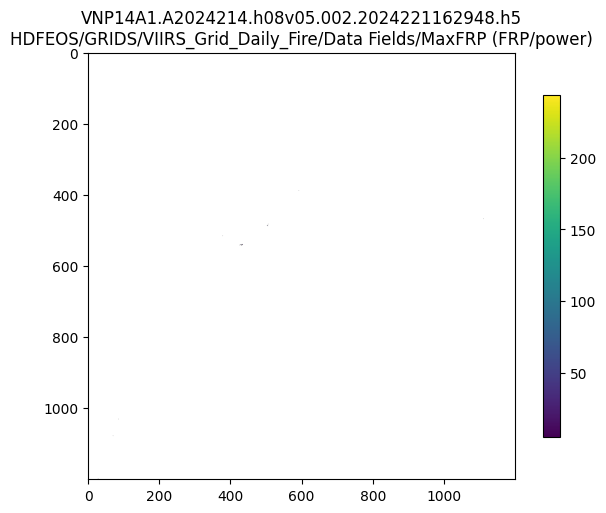

,file,mask_path,frp_path,qf_path,mask_unique,frp_count,frp_min,frp_max,frp_mean
0,VNP14A1.A2024214.h08v05.002.2024221162948.h5,HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...,HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...,,6,25,5.8,243.5,42.651997


In [12]:
# --- VIIRS NPP Thermal Anomalies & Fire Daily L3 1km (V002) ---
# Quick inspector: random sample, FireMask counts, FRP stats, and previews
# deps: pip install h5py numpy pandas matplotlib

from pathlib import Path
import random
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

VIIRS_DIR  = Path(r"D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002")
SAMPLE_K   = 2      # pick 2 random granules
RANDOM_SEED = 7     # set None if you want different picks each run

# Common dataset names seen in VNP14A1/V002 daily L3
MASK_CANDS = ["FireMask", "fire_mask", "Fire_Mask"]
FRP_CANDS  = ["MaxFRP", "FRP", "power", "FP_power", "FireRadiativePower"]
QF_CANDS   = ["QF1","QF2","Quality","DQF","QualityFlag"]

FILL_SENTINELS = {255, 32767, 65535, 9999, -9999, -28672}

def list_all_datasets(h5):
    out = []
    def v(n, o):
        if isinstance(o, h5py.Dataset):
            out.append(n)
    h5.visititems(v)
    return out

def find_first(h5, candidates):
    ds = list_all_datasets(h5)
    # exact basename
    for cand in candidates:
        for p in ds:
            if p.split("/")[-1].lower() == cand.lower():
                return p
    # fuzzy contains
    for cand in candidates:
        for p in ds:
            if cand.lower() in p.lower():
                return p
    return None

def read_masked_float(dset):
    """Read HDF5 dataset → float32, apply scale/offset and mask _FillValue/missing."""
    arr = dset[()]
    # scale/offset
    def as_float(x):
        try: return float(np.array(x).ravel()[0])
        except Exception: return None
    sf = as_float(dset.attrs.get("scale_factor"))
    ao = as_float(dset.attrs.get("add_offset"))
    if sf is not None or ao is not None:
        arr = arr.astype("float32", copy=False)
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        arr = arr * sf + ao
    arr = arr.astype("float32", copy=False)
    # mask fills
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = dset.attrs.get(key)
        if v is None: continue
        for x in np.array(v).ravel():
            try: bads.add(float(x))
            except Exception: pass
    for b in FILL_SENTINELS: bads.add(float(b))
    if bads:
        m = np.isin(arr, list(bads))
        arr[m] = np.nan
    arr[~np.isfinite(arr)] = np.nan
    return arr

def short_stats(a):
    v = a[np.isfinite(a)]
    return dict(
        count=int(v.size),
        min=float(np.nanmin(v)) if v.size else None,
        max=float(np.nanmax(v)) if v.size else None,
        mean=float(np.nanmean(v)) if v.size else None,
        std=float(np.nanstd(v)) if v.size else None
    )

# pick random files
all_files = sorted(VIIRS_DIR.rglob("*.h5"))
print(f"Found {len(all_files)} .h5 granule(s)")
if not all_files:
    raise SystemExit("No .h5 files found. Check VIIRS_DIR.")
if RANDOM_SEED is not None:
    random.seed(RANDOM_SEED)
files = random.sample(all_files, k=min(SAMPLE_K, len(all_files)))
print("Random picks:")
for f in files: print(" -", f.name)

for fp in files:
    print(f"\n=== {fp.name} ===")
    with h5py.File(fp, "r") as f:
        top = list(f.keys())
        print("Top-level groups:", top[:10], "..." if len(top) > 10 else "")

        mask_path = find_first(f, MASK_CANDS)
        frp_path  = find_first(f, FRP_CANDS)
        qf_path   = find_first(f, QF_CANDS)

        if mask_path is None:
            print("⚠️ Could not find FireMask; showing first 25 datasets to help:")
            for n in list_all_datasets(f)[:25]:
                print("  -", n)
            continue

        # Read FireMask (keep original dtype for value counts)
        FireMask_ds = f[mask_path]
        FireMask = FireMask_ds[()]
        # Build a float copy for preview with NaN masking
        FireMask_f = FireMask.astype("float32", copy=True)
        # mask nodata/fill-like
        fv = FireMask_ds.attrs.get("_FillValue")
        miss = FireMask_ds.attrs.get("missing_value")
        bads = set()
        for s in (fv, miss):
            if s is None: continue
            for x in np.array(s).ravel():
                try: bads.add(float(x))
                except Exception: pass
        for b in FILL_SENTINELS: bads.add(float(b))
        for b in bads:
            FireMask_f[FireMask_f == b] = np.nan

        # Value counts for FireMask
        finite = np.isfinite(FireMask_f)
        if finite.any():
            vals, cnts = np.unique(FireMask[finite], return_counts=True)
            order = np.argsort(cnts)[::-1]
            vals, cnts = vals[order], cnts[order]
            counts_df = pd.DataFrame({"FireMask_value": vals[:12], "count": cnts[:12]})
            print("FireMask (top values):")
            print(counts_df.to_string(index=False))
        else:
            print("FireMask appears fully masked/non-finite.")

        # Optional FRP / power
        frp_stats = None
        if frp_path is not None:
            FRP = read_masked_float(f[frp_path])
            frp_stats = short_stats(FRP)
            print(f"FRP stats ({frp_path}):", frp_stats)

        # Quick plots
        plt.figure(figsize=(6.4,5.2))
        plt.imshow(FireMask_f, origin="upper", aspect="equal")
        plt.title(fp.name + "\nFireMask (grid space; NaN=masked)")
        plt.colorbar(shrink=0.8)
        plt.tight_layout(); plt.show()

        if frp_path is not None and np.isfinite(FRP).any():
            plt.figure(figsize=(6.4,5.2))
            plt.imshow(FRP, origin="upper", aspect="equal")
            plt.title(fp.name + f"\n{frp_path} (FRP/power)")
            plt.colorbar(shrink=0.8)
            plt.tight_layout(); plt.show()

        # Optional QF/quality quick peek
        if qf_path:
            QF = read_masked_float(f[qf_path])
            if np.isfinite(QF).any():
                qv, qc = np.unique(QF[np.isfinite(QF)].astype(int), return_counts=True)
                order = np.argsort(qc)[::-1]
                print("Quality flag (top):")
                print(pd.DataFrame({"QF": qv[order][:10], "count": qc[order][:10]}).to_string(index=False))
            else:
                print("Quality flag present but masked/non-finite.")

        # Tiny summary table for this granule
        out = {
            "file": fp.name,
            "mask_path": mask_path,
            "frp_path": frp_path or "",
            "qf_path": qf_path or "",
            "mask_unique": int(vals.size) if finite.any() else 0,
            "frp_count": frp_stats["count"] if frp_path and frp_stats else 0,
            "frp_min": frp_stats["min"] if frp_path and frp_stats else None,
            "frp_max": frp_stats["max"] if frp_path and frp_stats else None,
            "frp_mean": frp_stats["mean"] if frp_path and frp_stats else None,
        }
        display(pd.DataFrame([out]))


# 1

## Metadata

### 

## EDA

In [14]:
# ERA5 AOI mean (California bbox) per time for variable 't' at 1000 hPa
# deps: xarray, numpy, pandas, matplotlib

import numpy as np, pandas as pd, matplotlib.pyplot as plt, xarray as xr

ERA5_FILE = r"D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\data_stream-moda_stepType-avgua.nc"
VAR = "t"  # you can switch to 'u','v','q','cc','r','z'

# California bbox (same bounds you used to download others)
LAT_MIN, LAT_MAX = 32.53, 42.01
LON_MIN, LON_MAX = -124.48, -114.13

ds = xr.open_dataset(ERA5_FILE)

# ERA5 longitudes are 0..360. Convert a copy to -180..180 for masking.
lon = ds["longitude"].values
lon180 = np.where(lon > 180.0, lon - 360.0, lon)
lat = ds["latitude"].values  # usually descending from 90 to -90

# Build 2D mask (lat x lon) for CA bbox
lon2d, lat2d = np.meshgrid(lon180, lat)
mask = (lat2d >= LAT_MIN) & (lat2d <= LAT_MAX) & (lon2d >= LON_MIN) & (lon2d <= LON_MAX)

# Select pressure level (example: 1000 hPa)
plev = float(ds["pressure_level"].values[0])  # change if you want 850 hPa etc.
da = ds[VAR].sel(pressure_level=plev)

# Apply mask and average over space per valid_time
masked = da.where(xr.DataArray(mask, dims=("latitude","longitude")))
ts = masked.mean(dim=("latitude","longitude"), skipna=True).to_series()
ts.index = pd.to_datetime(ts.index)  # ensure datetime index

# Save + plot
out_csv = r"D:\606Data\outputs\csv\era5_t_1000hpa_CA_timeseries.csv"
pd.Series(ts).to_csv(out_csv, header=["value"])
print("Saved:", out_csv)

plt.figure(figsize=(8,3.5))
plt.plot(ts.index, ts.values, marker="o", lw=1)
plt.title("ERA5 AOI Mean Temperature (1000 hPa) — California")
plt.xlabel("Date"); plt.ylabel("Temperature (K)")
plt.tight_layout(); plt.show()

ds.close()


OSError: Cannot save file into a non-existent directory: 'D:\606Data\outputs\csv'

In [5]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


PyTorch version: 2.4.1+cu121
CUDA available: True
Device: NVIDIA GeForce RTX 3060 Laptop GPU


In [1]:
import sys
print(sys.version)       # full string (e.g., 3.11.9 (tags/…))
print(sys.version_info)  # tuple (major, minor, micro, …)


3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]
sys.version_info(major=3, minor=12, micro=10, releaselevel='final', serial=0)
